# Importing Libraries

In [1]:
# Importing the NumPy and Pandas
import numpy as np
import pandas as pd

#Importing Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#Importing scikit-learn libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
import statsmodels.api as stm

#importing warnings
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 300
pd.options.display.max_columns = 300

# Data Understanding

In [2]:
#reading the csv file using pandas
churn = pd.read_csv("telecom_churn_data.csv")
churn.head() #checking the first 5 rows of the dataset

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
#Checking the shape of the dataset
churn.shape

(99999, 226)

So, there are a total of 99999 rows and 226 columns or say features.

In [4]:
#Checking the columns d-type
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
#Lets use info() with verbose to print all the feratures.
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
#checking the describe function for numerical columns
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

float64    179
int64       35
object      12
dtype: int64


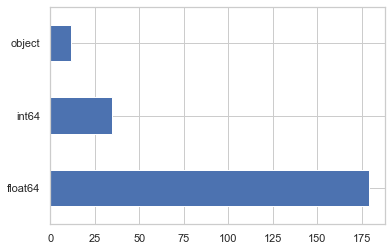

In [7]:
#Counting each type of datatype of the columns in the dataset
types = churn.dtypes                      #Storing all the datatypes in a variable
print(types.value_counts())
types.value_counts().plot.barh()        #Visualization of each datatype through barplot 
plt.show()

In [8]:
#Checking for entire duplicate rows present in the dataset.
churn.duplicated().sum()  #As the output is 0 it means that there are no two rows which are entirely identical.

0

# EDA

In [9]:
#A function for finding the percentage of null values in each column in the given dataset
def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)  

#Here we are rounding the number upto 2 decimal points and sorting so that 
#the columns with big percentage of missing values are shown at the top

In [10]:
#Checking the percentage of null values present in the columns
null_values(churn)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [11]:
#Checking null values that are more than 40%
nul_values_gr_40 = null_values(churn)[null_values(churn) > 40]
nul_values_gr_40

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [12]:
#As some columns as only a single value that menas a single entry for all the rows, 
#so such columns can be droppped as these will noit be of much help in our analysis
unique_col = churn.columns[churn.nunique()==1]
unique_col

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [13]:
churn.drop(unique_col, axis = 1, inplace = True)
churn.shape

(99999, 210)

### Lets analyze all the columns based on their dtypes and then do the analysis separately

#### object columns

In [14]:
churn.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=210)

In [15]:
obj_cols = [col for col in churn.columns if churn[col].dtype == "object"]
obj_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [16]:
#checking null values for the obj_col
null_values(churn[obj_cols])

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
date_of_last_rech_9          4.76
date_of_last_rech_8          3.62
date_of_last_rech_7          1.77
date_of_last_rech_6          1.61
dtype: float64

In [17]:
churn[obj_cols].describe()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
count,98392,98232,96377,95239,25153,25571,26339,25922
unique,30,31,31,30,30,31,31,30
top,6/30/2014,7/31/2014,8/31/2014,9/29/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014
freq,16960,17288,14706,22623,1888,1813,1998,2329


In [18]:
#Dropping columns with more than 40% missing values
churn.drop(["date_of_last_rech_data_6", 
            "date_of_last_rech_data_7", 
            "date_of_last_rech_data_9", 
            "date_of_last_rech_data_8"], axis = 1, inplace = True)
churn.shape

(99999, 206)

In [19]:
obj_cols = [ele for ele in obj_cols if ele not in ["date_of_last_rech_data_6", 
            "date_of_last_rech_data_7", 
            "date_of_last_rech_data_9", 
            "date_of_last_rech_data_8"]]

In [20]:
obj_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [21]:
#Now changing the leftover object columns to the right dtype that is datetime format
for col in obj_cols:
    churn[col] = pd.to_datetime(churn[col])
churn[obj_cols].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,2014-06-21,2014-07-16,2014-08-08,2014-09-28
1,2014-06-29,2014-07-31,2014-08-28,2014-09-30
2,2014-06-17,2014-07-24,2014-08-14,2014-09-29
3,2014-06-28,2014-07-31,2014-08-31,2014-09-30
4,2014-06-26,2014-07-28,2014-08-09,2014-09-28


In [22]:
#Cross-checking the dtype for the datetime format columns
churn[obj_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_of_last_rech_6  98392 non-null  datetime64[ns]
 1   date_of_last_rech_7  98232 non-null  datetime64[ns]
 2   date_of_last_rech_8  96377 non-null  datetime64[ns]
 3   date_of_last_rech_9  95239 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 3.1 MB


#### numeric columns

In [23]:
num_cols = [col for col in churn.columns if (churn[col].dtype == "float64" or churn[col].dtype == "int64")]
num_cols

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

In [24]:
churn[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 202 entries, mobile_number to sep_vbc_3g
dtypes: float64(168), int64(34)
memory usage: 154.1 MB


In [25]:
null_values(churn[num_cols])

count_rech_3g_6       74.85
max_rech_data_6       74.85
av_rech_amt_data_6    74.85
total_rech_data_6     74.85
night_pck_user_6      74.85
arpu_2g_6             74.85
fb_user_6             74.85
count_rech_2g_6       74.85
arpu_3g_6             74.85
total_rech_data_7     74.43
arpu_2g_7             74.43
arpu_3g_7             74.43
max_rech_data_7       74.43
count_rech_3g_7       74.43
count_rech_2g_7       74.43
fb_user_7             74.43
av_rech_amt_data_7    74.43
night_pck_user_7      74.43
max_rech_data_9       74.08
arpu_3g_9             74.08
count_rech_2g_9       74.08
arpu_2g_9             74.08
av_rech_amt_data_9    74.08
count_rech_3g_9       74.08
night_pck_user_9      74.08
total_rech_data_9     74.08
fb_user_9             74.08
arpu_3g_8             73.66
av_rech_amt_data_8    73.66
fb_user_8             73.66
count_rech_2g_8       73.66
max_rech_data_8       73.66
night_pck_user_8      73.66
count_rech_3g_8       73.66
arpu_2g_8             73.66
total_rech_data_8   

In [26]:
#Dropping columns which are having null values more than 70% 
#except some columns which reasons out why they are having null values
col_drop = churn.columns[round(100*churn.isnull().sum()/len(churn),2)> 70]
data_col = ['total_rech_data_6',
            'total_rech_data_7',
            'total_rech_data_8',
            'total_rech_data_9',
            'av_rech_amt_data_6',
            'av_rech_amt_data_7',
            'av_rech_amt_data_8',
            'av_rech_amt_data_9']

col_drop = [col for col in col_drop if col not in data_col]
churn.drop(col_drop, axis=1, inplace=True)
churn.shape

(99999, 178)

In [27]:
#Dropping mobile number since that will not add anything to our analysis
churn.drop('mobile_number', axis=1, inplace=True)
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 177 entries, arpu_6 to sep_vbc_3g
dtypes: datetime64[ns](4), float64(140), int64(33)
memory usage: 135.0 MB


In [28]:
#As we know that some users may not recharge or 
#use data so for them it will be null values so for all those columns lets impute with 0
def impute(cols):
    for col in cols:
        churn[col].fillna(0, inplace=True)

In [29]:
#Defining num_cols again
num_cols = [col for col in churn.columns if (churn[col].dtype == "float64" or churn[col].dtype == "int64")]
num_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_o

In [30]:
impute(num_cols)

In [31]:
null_values(churn)

date_of_last_rech_9    4.76
date_of_last_rech_8    3.62
date_of_last_rech_7    1.77
date_of_last_rech_6    1.61
sep_vbc_3g             0.00
std_og_mou_6           0.00
isd_og_mou_9           0.00
isd_og_mou_8           0.00
isd_og_mou_7           0.00
isd_og_mou_6           0.00
std_og_mou_9           0.00
std_og_mou_8           0.00
std_og_mou_7           0.00
std_og_t2f_mou_7       0.00
std_og_t2f_mou_9       0.00
std_og_t2f_mou_8       0.00
spl_og_mou_7           0.00
std_og_t2f_mou_6       0.00
std_og_t2m_mou_9       0.00
std_og_t2m_mou_8       0.00
std_og_t2m_mou_7       0.00
std_og_t2m_mou_6       0.00
spl_og_mou_6           0.00
spl_og_mou_8           0.00
std_og_t2t_mou_8       0.00
loc_ic_t2t_mou_8       0.00
loc_ic_t2f_mou_9       0.00
loc_ic_t2f_mou_8       0.00
loc_ic_t2f_mou_7       0.00
loc_ic_t2f_mou_6       0.00
loc_ic_t2m_mou_9       0.00
loc_ic_t2m_mou_8       0.00
loc_ic_t2m_mou_7       0.00
loc_ic_t2m_mou_6       0.00
loc_ic_t2t_mou_9       0.00
loc_ic_t2t_mou_7    

Lets not impute any values for the remaining null values which are of date columns.

### Deriving new features

In [32]:
#Determining the average recharge amount by adding the total recharge amount to the total data recharge amount.
#Total data recharge is computed by multiplying the total number of data recharges by the average data recharge amount.
churn['avg_total_rech_amt_67']=(churn['total_rech_amt_6']+churn["total_rech_data_6"]*churn['av_rech_amt_data_6']+
                                 churn['total_rech_amt_7']+churn["total_rech_data_7"]*churn['av_rech_amt_data_7'])/2

In [33]:
#We are generating an average column for all attributes for months 6 and 7, 
#as our high-value customers are identified based on the average recharge value during these months.
mnth_6_7_col = churn.select_dtypes(include=['int64','float64']).filter(regex='_6$|_7$').columns.str[:-2]
mnth_6_7_col_unq = list(mnth_6_7_col.unique())
mnth_6_7_col_unq.remove('total_rech_amt')
print(mnth_6_7_col_unq)

for col in mnth_6_7_col_unq:
  avg_col_nm = 'avg_'+col+'_67'
  churn[avg_col_nm] = (churn[col+'_6'] + churn[col+'_7'])/2

['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'max_rech_amt', 'last_day_rch_amt', 'total_rech_data', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g']


In [34]:
churn.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_total_rech_amt_67,avg_arpu_67,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2t_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_loc_og_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_std_og_mou_67,avg_isd_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2m_mou_67,avg_loc_ic_t2f_mou_67,avg_loc_ic_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_std_ic_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0

In [35]:
#As the average column is created we can drop the 6 and 7 month column
churn.drop(churn.select_dtypes(include=['int64','float64']).filter(regex='_6$|_7$').columns,axis=1,inplace=True)
churn.shape

(99999, 135)

### Filtering High value customers

In [36]:
#Required Quantile is at 70 percent, so
quan = churn["avg_total_rech_amt_67"].quantile(.7)
new_churn = churn[churn["avg_total_rech_amt_67"] >= quan]
new_churn.shape

(30001, 135)

So we got rows around 30k which is close to what was asked after filtering the high value customers

### Tagging Churners and removing attributes of the churn phase

So, people who hasent made any calls or received any calls and havent used the internet in the churn phasewill be used to tag churners.
So, for these we will have to focus on 4 columns which are:-
- total_ic_mou_9 
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [37]:
#Defining function for it
def define_churn(row):
    if (row["total_ic_mou_9"]==0) & (row["total_og_mou_9"]==0) & (row["vol_2g_mb_9"]==0) & (row["vol_3g_mb_9"]==0):
        return 1
    else: return 0

In [38]:
new_churn['Churn']=new_churn.apply(define_churn,axis=1)
new_churn.head()

,arpu_8,arpu_9,onnet_mou_8,onnet_mou_9,offnet_mou_8,offnet_mou_9,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_8,std_og_mou_9,isd_og_mou_8,isd_og_mou_9,spl_og_mou_8,spl_og_mou_9,og_others_8,og_others_9,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_8,std_ic_mou_9,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_8,isd_ic_mou_9,ic_others_8,ic_others_9,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_8,total_rech_data_9,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_8,monthly_2g_9,sachet_2g_8,sachet_2g_9,monthly_3g_8,monthly_3g_9,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_total_rech_amt_67,avg_arpu_67,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2t_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_loc_og_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_std_og_mou_67,avg_isd_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2m_mou_67,avg_loc_ic_t2f_mou_67,avg_loc_ic_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_std_ic_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,Churn
0,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.16,0.00,4.13,0.00,1.15,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.0,0.00,0.0,2,6,252,0,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,0,1.0,0.0,252.0,0.0,5.75,0.00,109.61,0.00,0,0,0,0,1,0,0,0,968,30.40,0.00,101.20,3.58,559.0,206.1005,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.5,252.0,252.0,1.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,1
7,3171.480,500.000,52.29,0.00,325.91,0.00,31.64,0.0,38.06,0.0,40.28,0.00,162.28,0.00,53.23,0.00,0.00,0.00,255.79,0.00,12.01,0.00,49.14,0.00,16.68,0.00,77.84,0.00,10.01,0.0,6.50,0.00,0.0,0.0,350.16,0.00,27.31,0.00,121.19,0.00,39.53,0.00,188.04,0.00,30.39,0.00,141.33,0.00,22.21,0.0,193.94,0.00,428.74,0.00,0.0,0.0,31.59,0.0,15.14,0.0,7,3,3638,0,1580,0,2014-06-27,2014-07-25,2014-08-26,2014-09-30,779,0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,1185.0,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,1
8,137.362,166.787,35.08,33.46,136.48,108.71,0.00,0.0,0.00,0.0,12.49,26.13,50.54,34.58,0.00,0.00,7.15,0.00,63.04,60.71,22.58,7.33,75.69,74.13,0.00,0.00,98.28,81.46,0.00,0.0,10.23,0.00,0.0,0.0,171.56,142.18,0.31,4.03,15.48,17.34,0.00,0.00,15.79,21.38,0.10,0.00,0.65,13.53,0.00,0.0,0.75,13.53,16.54,34.91,0.0,0.0,0.00,0.0,0.00,0.0,14,15,120,186,30,36,2014-06-25,2014-07

In [39]:
#Percentage of churn customers
new_churn["Churn"].value_counts(normalize=True)

0    0.918636
1    0.081364
Name: Churn, dtype: float64

This tells us that the data is highly imbalanced, where the churn percentage is close to 8% and non-churn percentage is close to 92%

In [40]:
#Dropping all the columns or features which corresponds to the churn phase
cols_9=[col for col in new_churn.columns if '_9' in col]
new_churn.drop(cols_9,axis=1, inplace=True)
new_churn.shape

(30001, 93)

In [41]:
#Lets drop the date columns to as they will not help in our analysis
date_col=[col for col in new_churn.columns if 'date' in col]
new_churn.drop(date_col,axis=1,inplace=True)
new_churn.shape

(30001, 90)

In [42]:
new_churn.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_total_rech_amt_67,avg_arpu_67,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2t_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_loc_og_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_std_og_mou_67,avg_isd_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2m_mou_67,avg_loc_ic_t2f_mou_67,avg_loc_ic_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_std_ic_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,Churn
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,2,252,252,252,1.0,252.0,5.75,109.61,0,0,1,0,968,30.40,0.00,101.20,3.58,559.0,206.1005,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.5,252.0,252.0,1.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,1
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.00,0.00,0,0,0,0,802,57.74,19.38,18.74,0.00,1185.0,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,1
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,3.0,69.0,0.03,11.94,0,3,0,0,315,21.03,910.65,122.16,0.00,696.0,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,122.0,25.0,1.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0,0
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.0,0.0,0.00,0.00,0,0,0,0,720,0.00,0.00,0.00,0.00,640.0,556.1030,117.26,827.305,0.00,0.000,5.320,89.870,0.375,0.0,95.565,111.935,737.050,0.00,848.990,0.000,0.00,0.0,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.000,62.985,169.490,0.000,0.000,0.000,24.0,50.0,25.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,0,2.0,270.0,0.01,1009.92,0,0,1,1,604,40.45,51.86,0.00,0.00,583.0,134.1235,49.81,87.385,0.00,0.000,49.810,82.975,0.000,0.0,132.795,0.000,4.355,0.00,4.355,0.005,0.05,0.0,137.210,40.875,104.635,0.000,145.520,0.255,8.660,0.000,8.915,171.235,0.000,14.115,2.675,4.0,89.5,89.5,1.0,178.0,0.240,299.545,0.0,0.0,1.0,0.0,0


### Visualizations

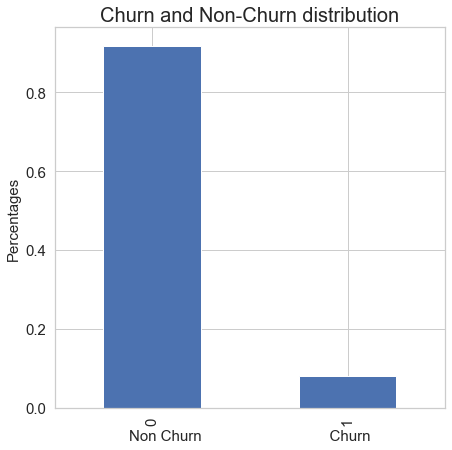

In [43]:
# plot for checking the percetanges of churn and non churn
plt.figure(figsize=(7,7))
new_churn["Churn"].value_counts(normalize=True).plot.bar()
plt.tick_params(size=5,labelsize = 15) 
plt.title("Churn and Non-Churn distribution",fontsize=20)
plt.ylabel("Percentages",fontsize=15)
plt.xlabel("Non Churn                               Churn",fontsize=15)
plt.grid(0.3)
plt.show()

In [44]:
# plot for all the columns which are related to the rech that is recharge
rech_cols = [col for col in new_churn.columns if 'rech' in col]
rech_cols

['total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'total_rech_data_8',
 'av_rech_amt_data_8',
 'avg_total_rech_amt_67',
 'avg_total_rech_num_67',
 'avg_max_rech_amt_67',
 'avg_total_rech_data_67',
 'avg_av_rech_amt_data_67']

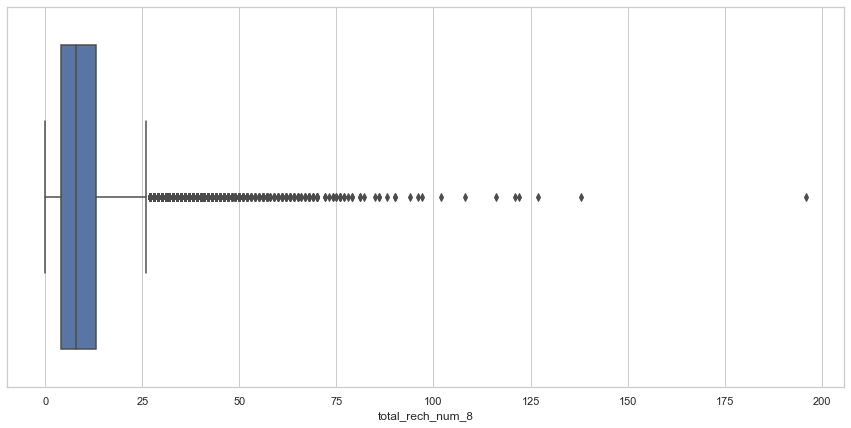

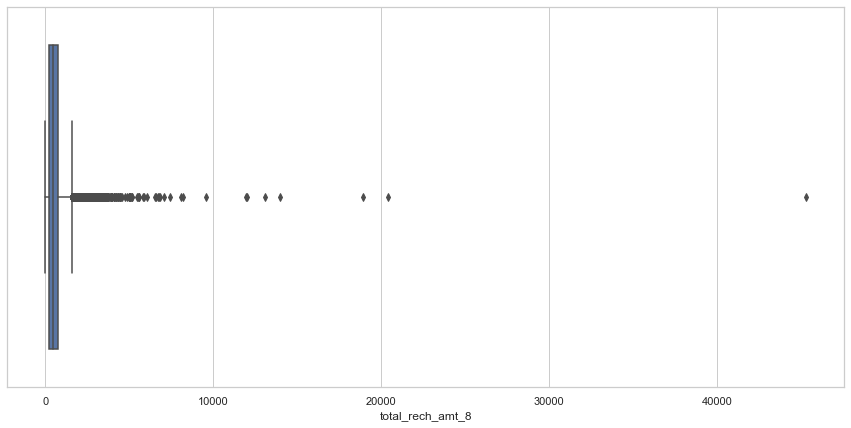

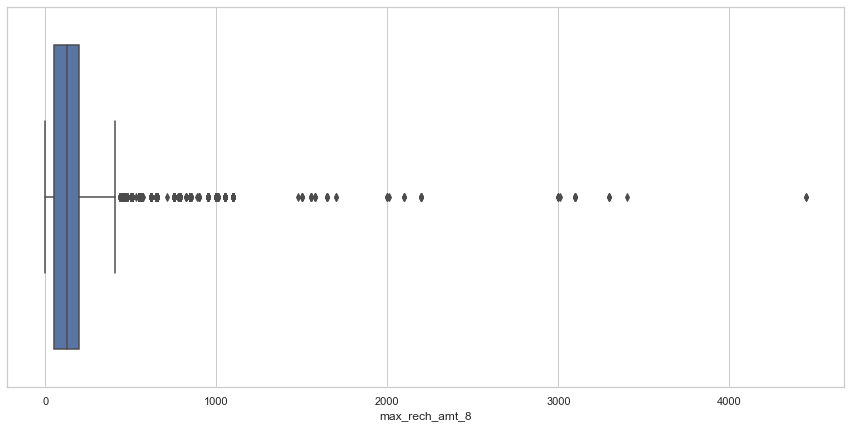

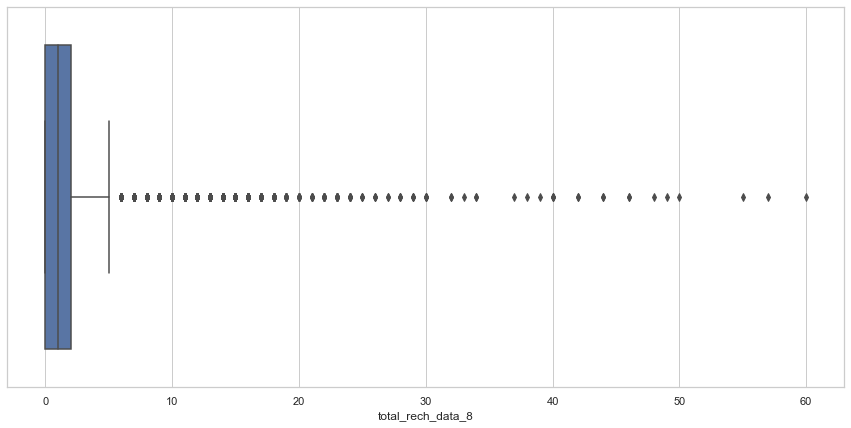

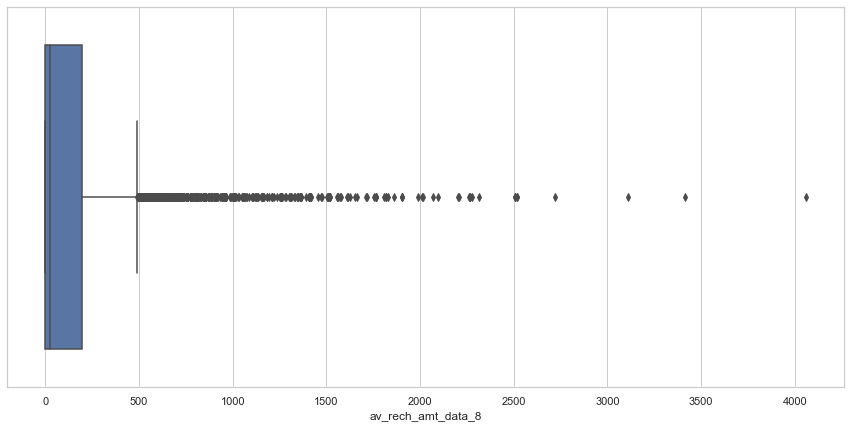

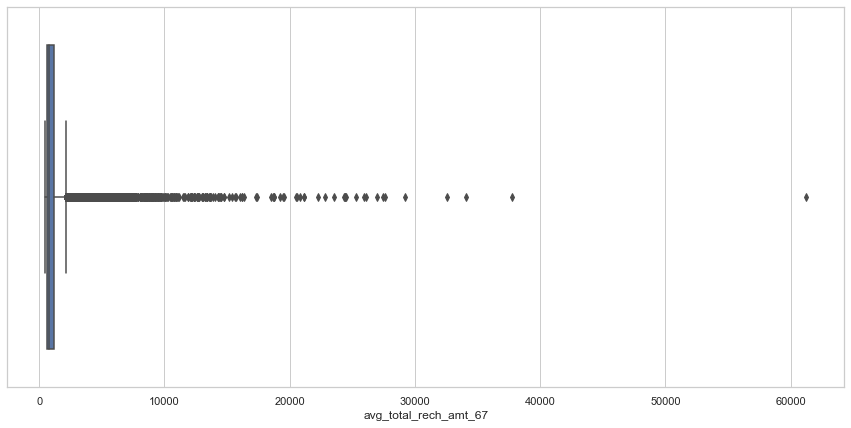

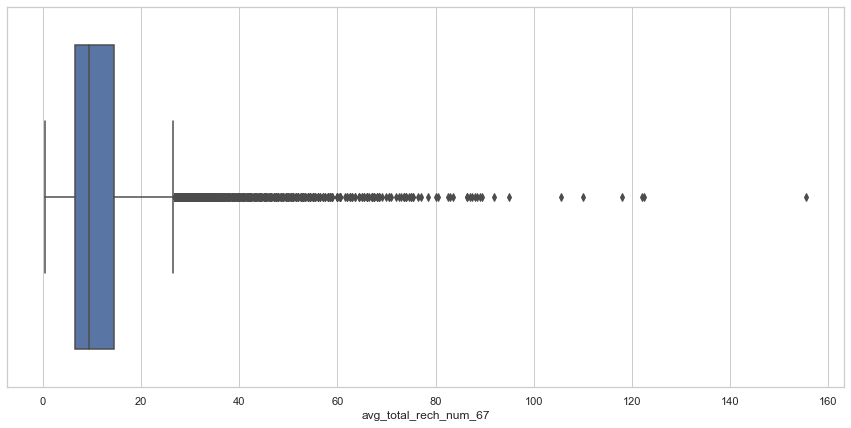

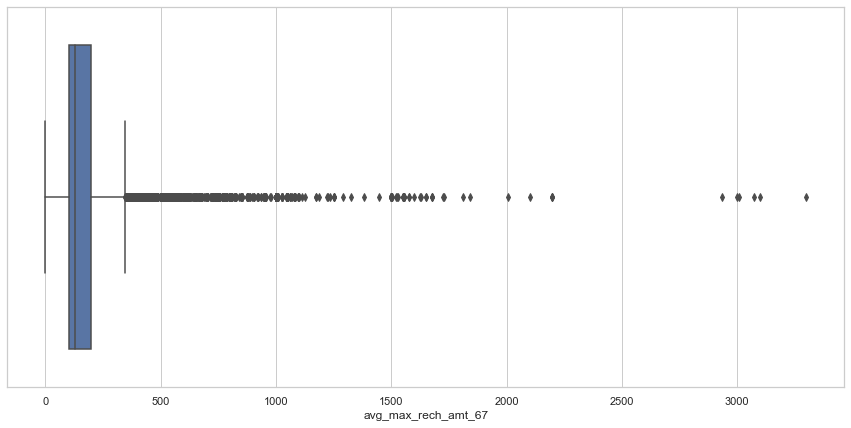

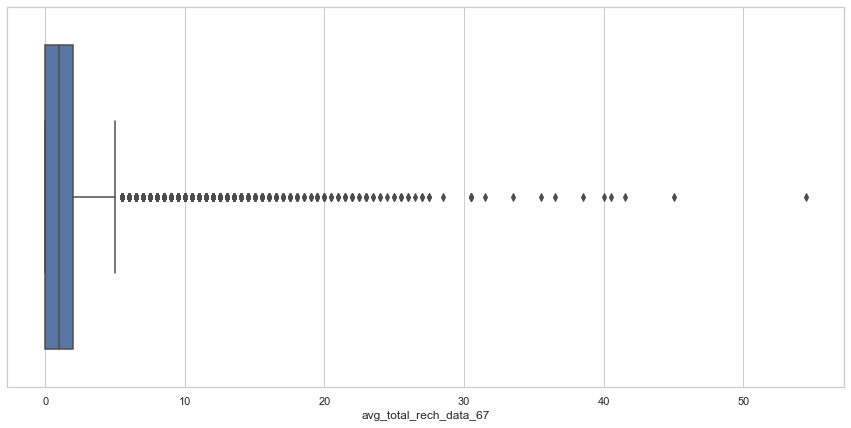

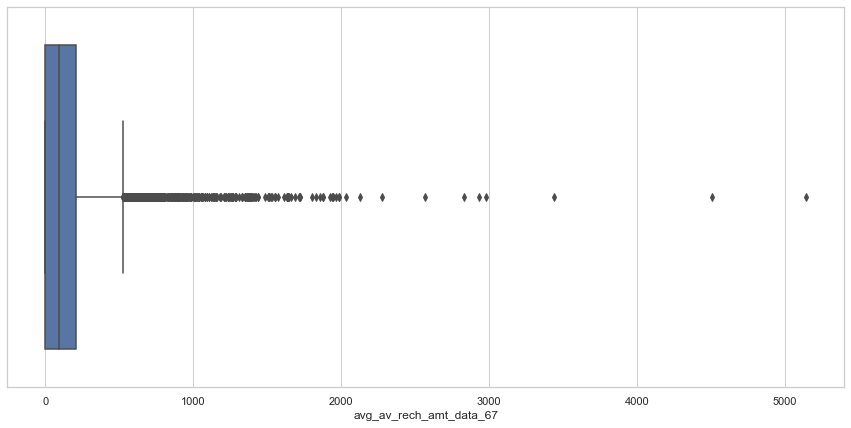

In [45]:
# plotting box plot
for col in rech_cols:
    plt.figure(figsize = [15,7])
    sns.boxplot(new_churn[col])
    plt.show()

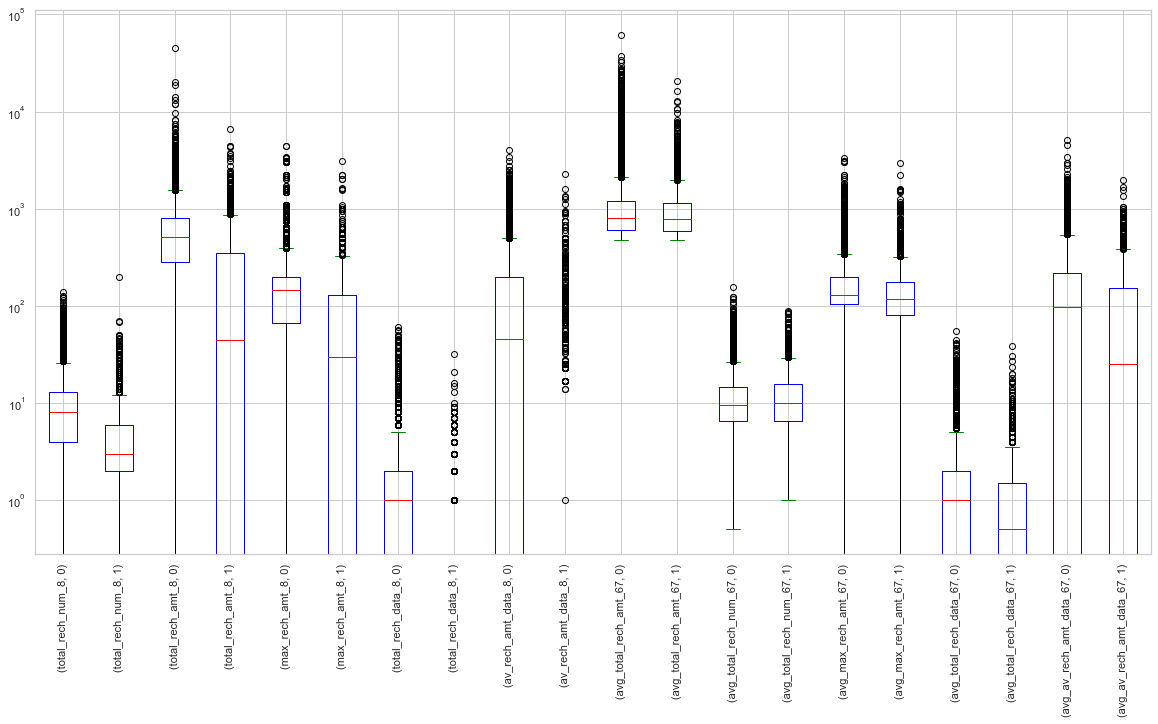

In [46]:
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

box_colors = {'boxes': 'blue', 'whiskers': 'black', 'medians': 'red', 'caps': 'green'}
new_churn.pivot(columns='Churn')[rech_cols].plot(kind = 'box', ax=ax, color = box_colors)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')
plt.show()

In [47]:
#Now checking the the values in quantiles for recharge columns for outlier treatment
new_churn[rech_cols].describe(percentiles=[0.75, 0.8, 0.9, 0.99, 0.999, 0.9999])

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,total_rech_data_8,av_rech_amt_data_8,avg_total_rech_amt_67,avg_total_rech_num_67,avg_max_rech_amt_67,avg_total_rech_data_67,avg_av_rech_amt_data_67
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,9.972868,584.365454,160.144462,1.621913,122.132258,1152.620628,11.784924,170.743275,1.760758,135.218053
std,9.274370,611.245907,173.207799,2.996010,195.586944,1358.713982,8.634676,154.193137,2.706465,182.000971
min,0.000000,0.000000,0.000000,0.000000,0.000000,478.000000,0.500000,0.000000,0.000000,0.000000
50%,8.000000,490.000000,130.000000,1.000000,25.000000,800.000000,9.500000,128.000000,1.000000,92.000000
75%,13.000000,776.000000,198.000000,2.000000,196.000000,1208.000000,14.500000,200.000000,2.000000,210.500000
80%,15.000000,860.000000,229.000000,2.000000,229.000000,1368.000000,16.000000,234.500000,2.500000,235.500000
90%,21.000000,1148.000000,252.000000,5.000000,308.000000,1991.500000,22.000000,300.000000,5.000000,314.000000
99%,45.000000,2341.000000,951.000000,13.000000,907.000000,6090.500000,44.500000,799.500000,12.000000,782.000000
99.9%,75.000000,5021.000000,2000.000000,28.000000,1764.000000,17408.500000,74.000000,1555.000000,23.500000,1638.000000


Lets remove the outliers whose calues are more the the 99.99 percentile

In [48]:
quan = new_churn["total_rech_amt_8"].quantile(0.9999) 
new_churn = new_churn[new_churn["total_rech_amt_8"] <= quan]
new_churn.shape

(29997, 90)

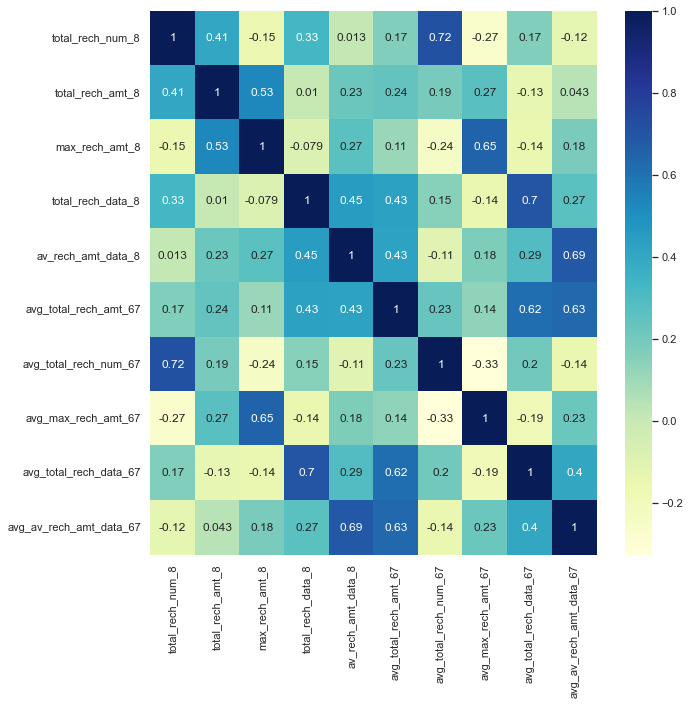

In [49]:
#Correlation
plt.figure(figsize = [10,10])
sns.heatmap(new_churn[rech_cols].corr(), cmap = "YlGnBu", annot = True)
plt.show()

As there is not much corrletaion that is values greater than 0.75 lets continue.

In [50]:
# Plotting the average revenue with the churn column boxplot
arpu_cols= [col for col in new_churn.columns if 'arpu' in col]
arpu_cols

['arpu_8', 'avg_arpu_67']

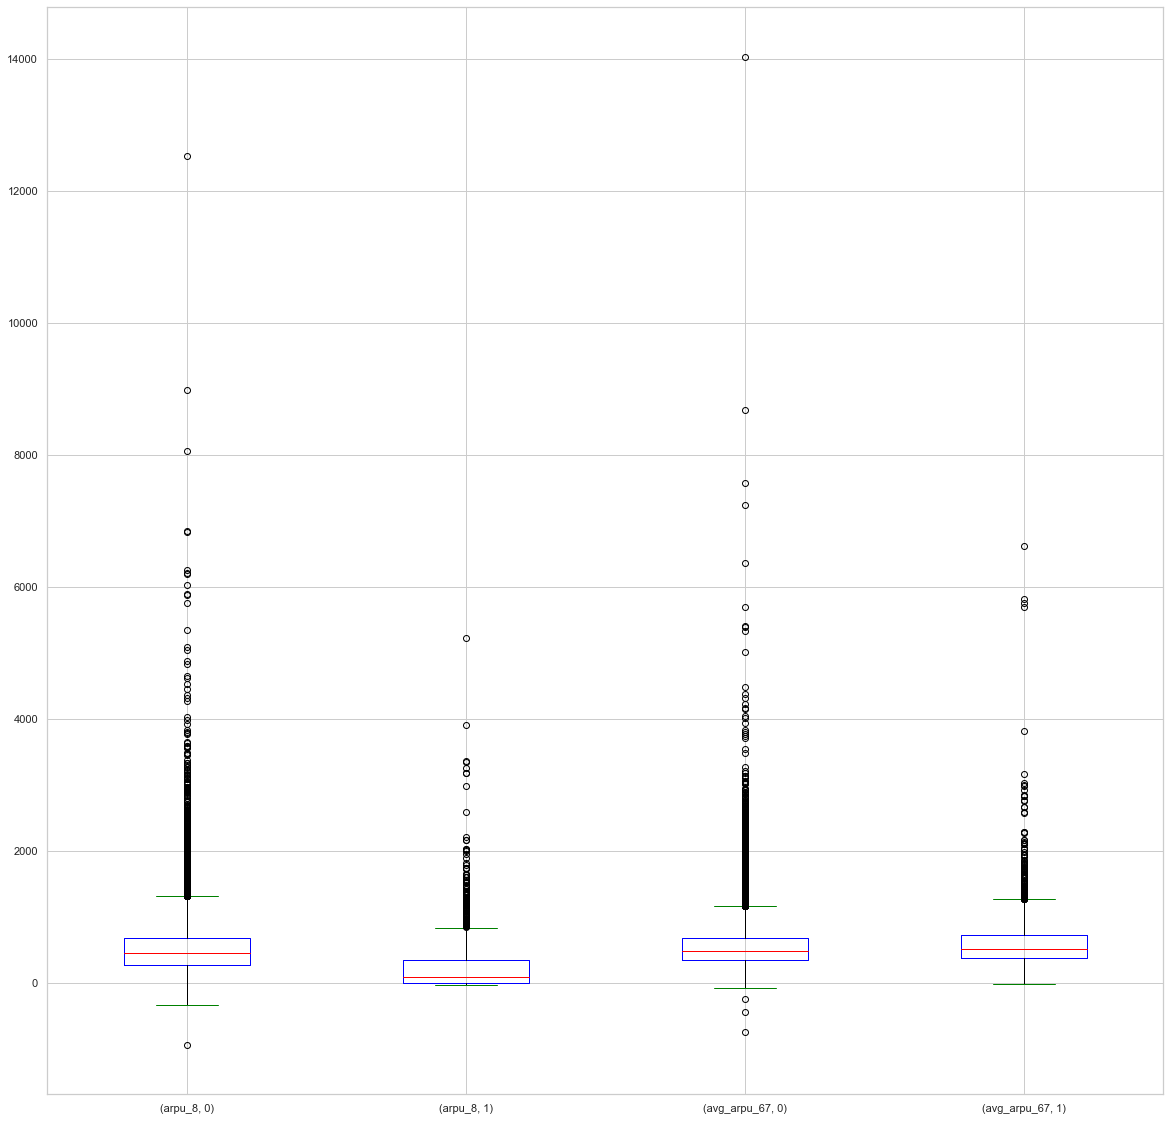

In [51]:
#For plotting we need to use pivot to convert the values to the appropriate format
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 20))
ax=axes[0][0]

box_colors = {'boxes': 'blue', 'whiskers': 'black', 'medians': 'red', 'caps': 'green'}
new_churn.pivot(columns='Churn')[arpu_cols].plot(kind = 'box', ax=ax, color = box_colors)
plt.show()

We can see that the ARPU decreases for the churned customers for the 8th month.

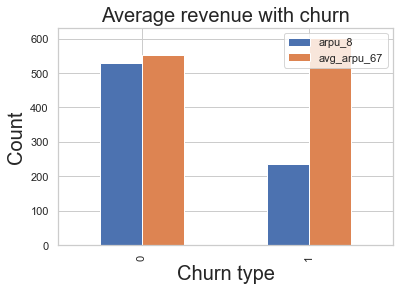

In [52]:
#plotting barplot for the same
new_churn.groupby("Churn")[arpu_cols].mean().plot.bar() 
plt.title("Average revenue with churn",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Churn type",fontsize=20)
plt.show()

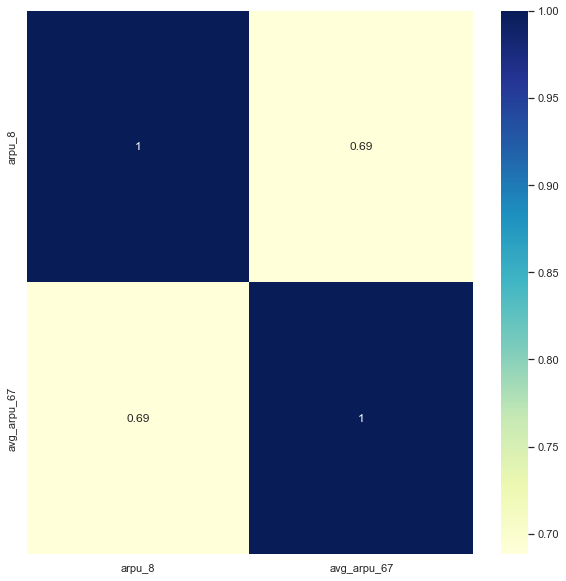

In [53]:
#Correlation
plt.figure(figsize = [10,10])
sns.heatmap(new_churn[arpu_cols].corr(), cmap = "YlGnBu", annot = True)
plt.show()

Not much correlation here too

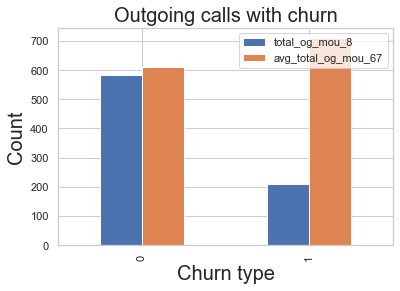

In [54]:
#plotting barplot for outgoing calls columns
og_cols = [col for col in new_churn.columns if 'total_og' in col]
new_churn.groupby("Churn")[og_cols].mean().plot.bar() 
plt.title("Outgoing calls with churn",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Churn type",fontsize=20)
plt.show()

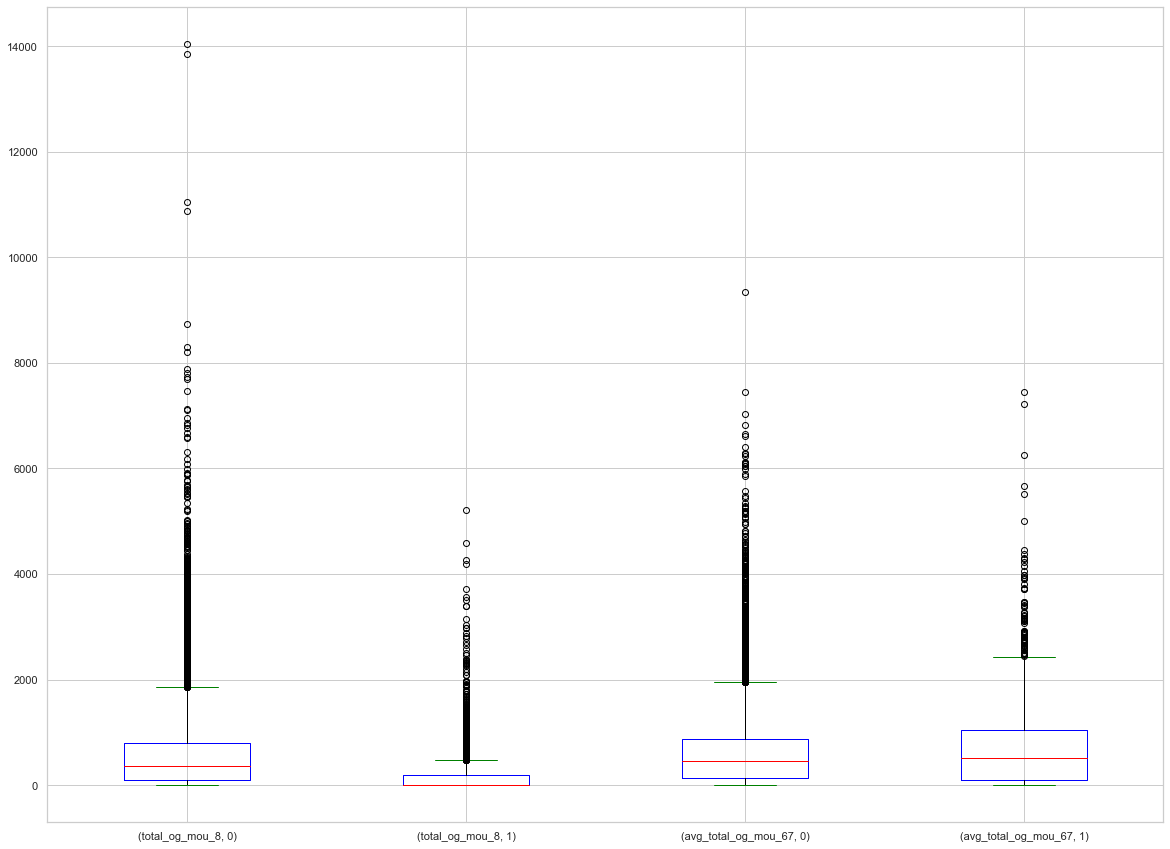

In [55]:
#box plot for the same
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 15))
ax=axes[0][0]

box_colors = {'boxes': 'blue', 'whiskers': 'black', 'medians': 'red', 'caps': 'green'}
new_churn.pivot(columns='Churn')[og_cols].plot(kind = 'box', ax=ax, color = box_colors)
plt.show()

The total outgoing calls is decresing for the churned customers

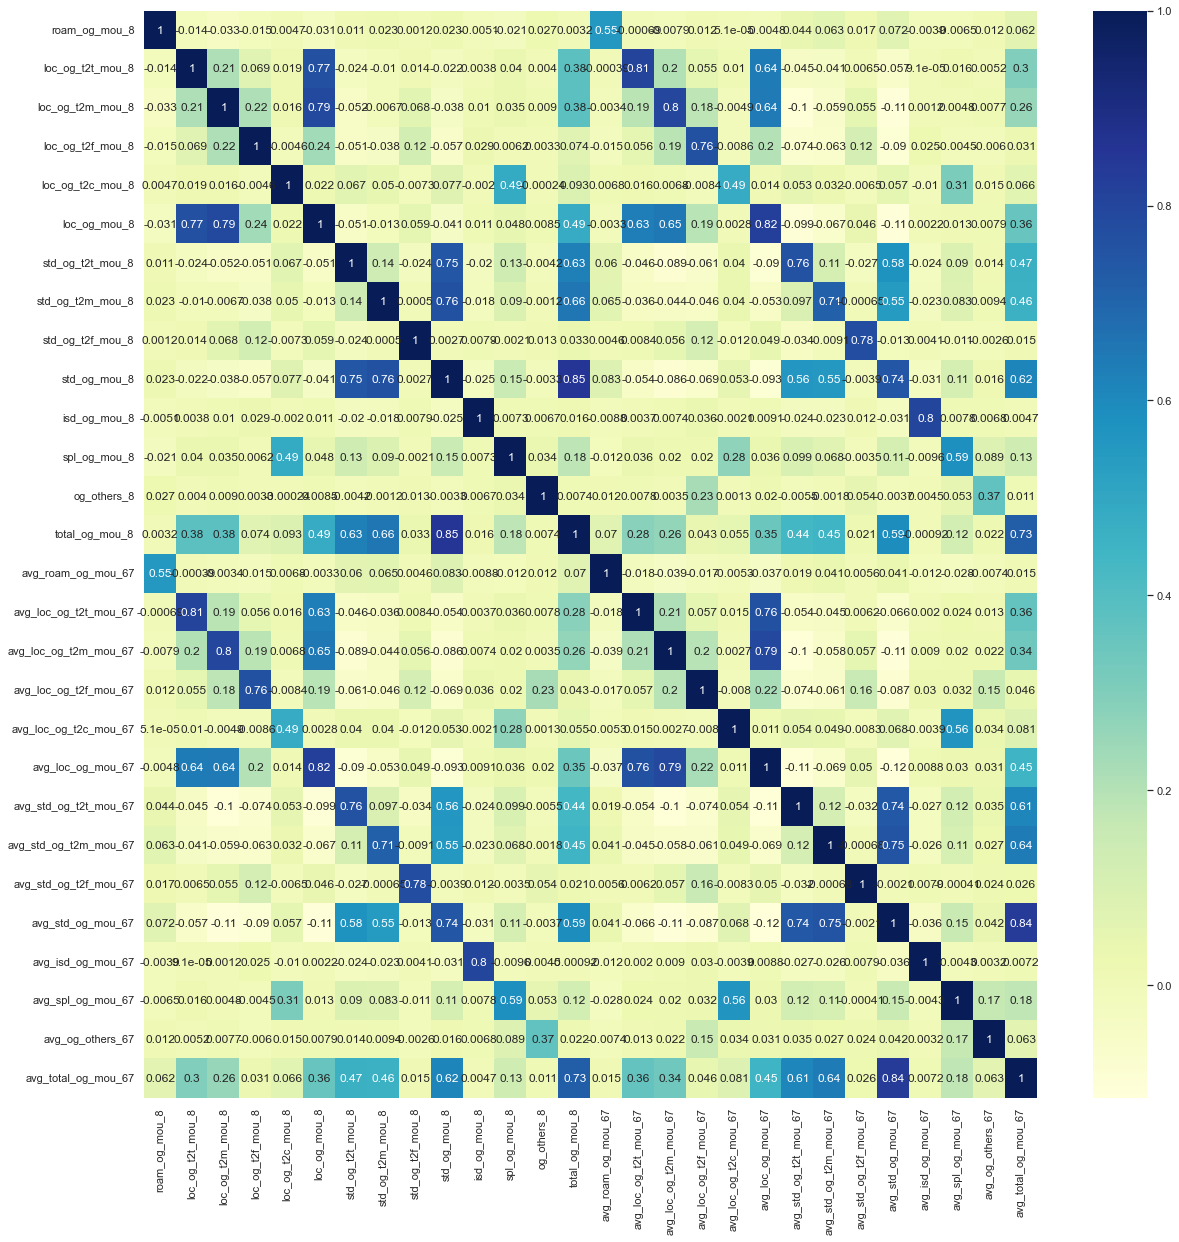

In [56]:
#Correlation
og = [col for col in new_churn.columns if 'og' in col]

plt.figure(figsize = [20,20])
sns.heatmap(new_churn[og].corr(), cmap = "YlGnBu", annot = True)
plt.show()

In [57]:
#Dropping features which are having high corrletion that is more then 0.75
new_churn.drop(['std_og_mou_8',
                'avg_std_og_mou_67',
                'avg_loc_og_mou_67', 
                'avg_loc_og_t2t_mou_67',
                'avg_isd_og_mou_67',
                'avg_loc_og_t2m_mou_67',
                'loc_og_t2m_mou_8',
                'avg_std_og_t2f_mou_67',
                'avg_loc_og_t2f_mou_67',
                'avg_std_og_t2t_mou_67',
                'avg_std_og_mou_67'] , axis=1, inplace=True)
new_churn.shape

(29997, 80)

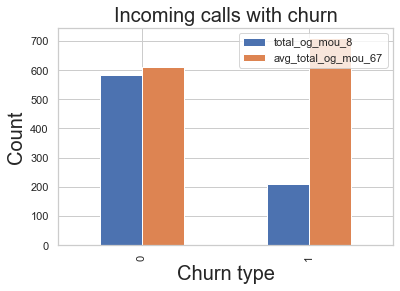

In [58]:
#plotting barplot for incoming calls columns
ic_cols = [col for col in new_churn.columns if 'total_ic' in col]
new_churn.groupby("Churn")[og_cols].mean().plot.bar() 
plt.title("Incoming calls with churn",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Churn type",fontsize=20)
plt.show()

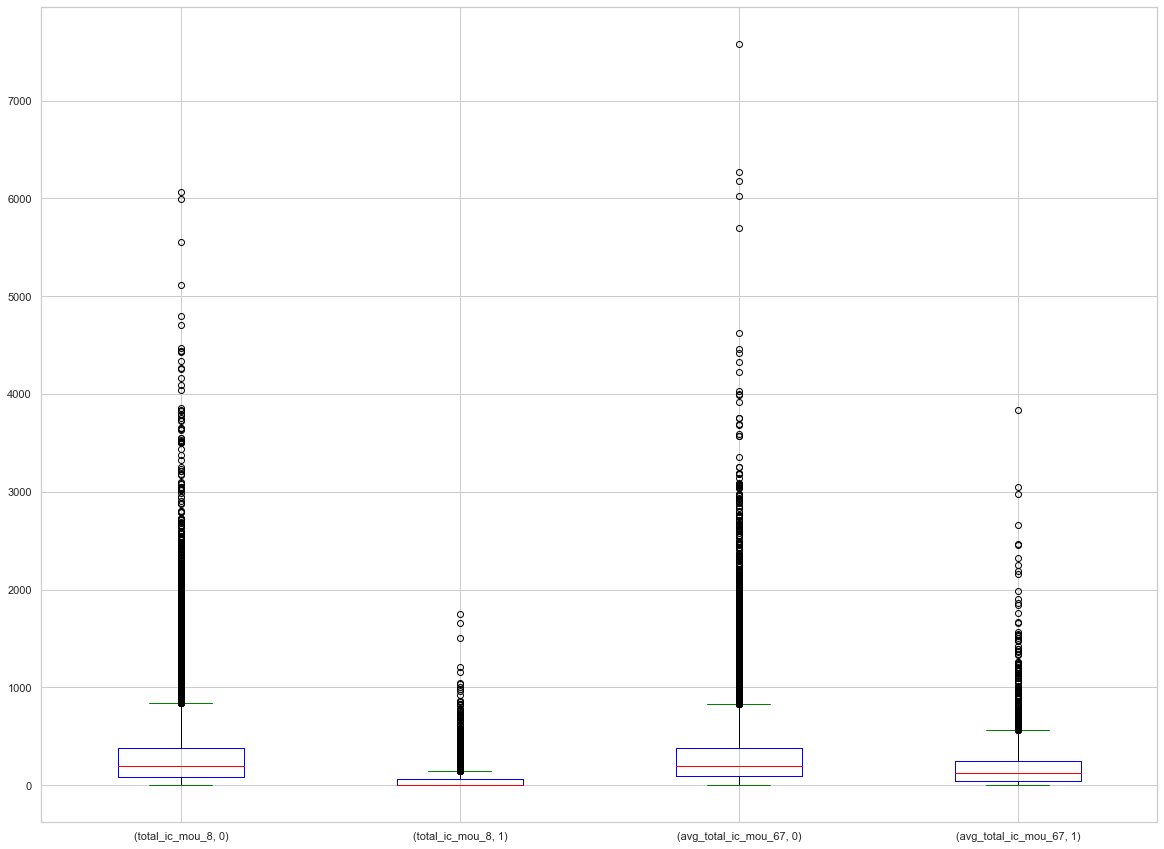

In [59]:
#box plot for the same
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 15))
ax=axes[0][0]

box_colors = {'boxes': 'blue', 'whiskers': 'black', 'medians': 'red', 'caps': 'green'}
new_churn.pivot(columns='Churn')[ic_cols].plot(kind = 'box', ax=ax, color = box_colors)
plt.show()

Incoming calls are also gradually decresing over the months passed for the churned customers

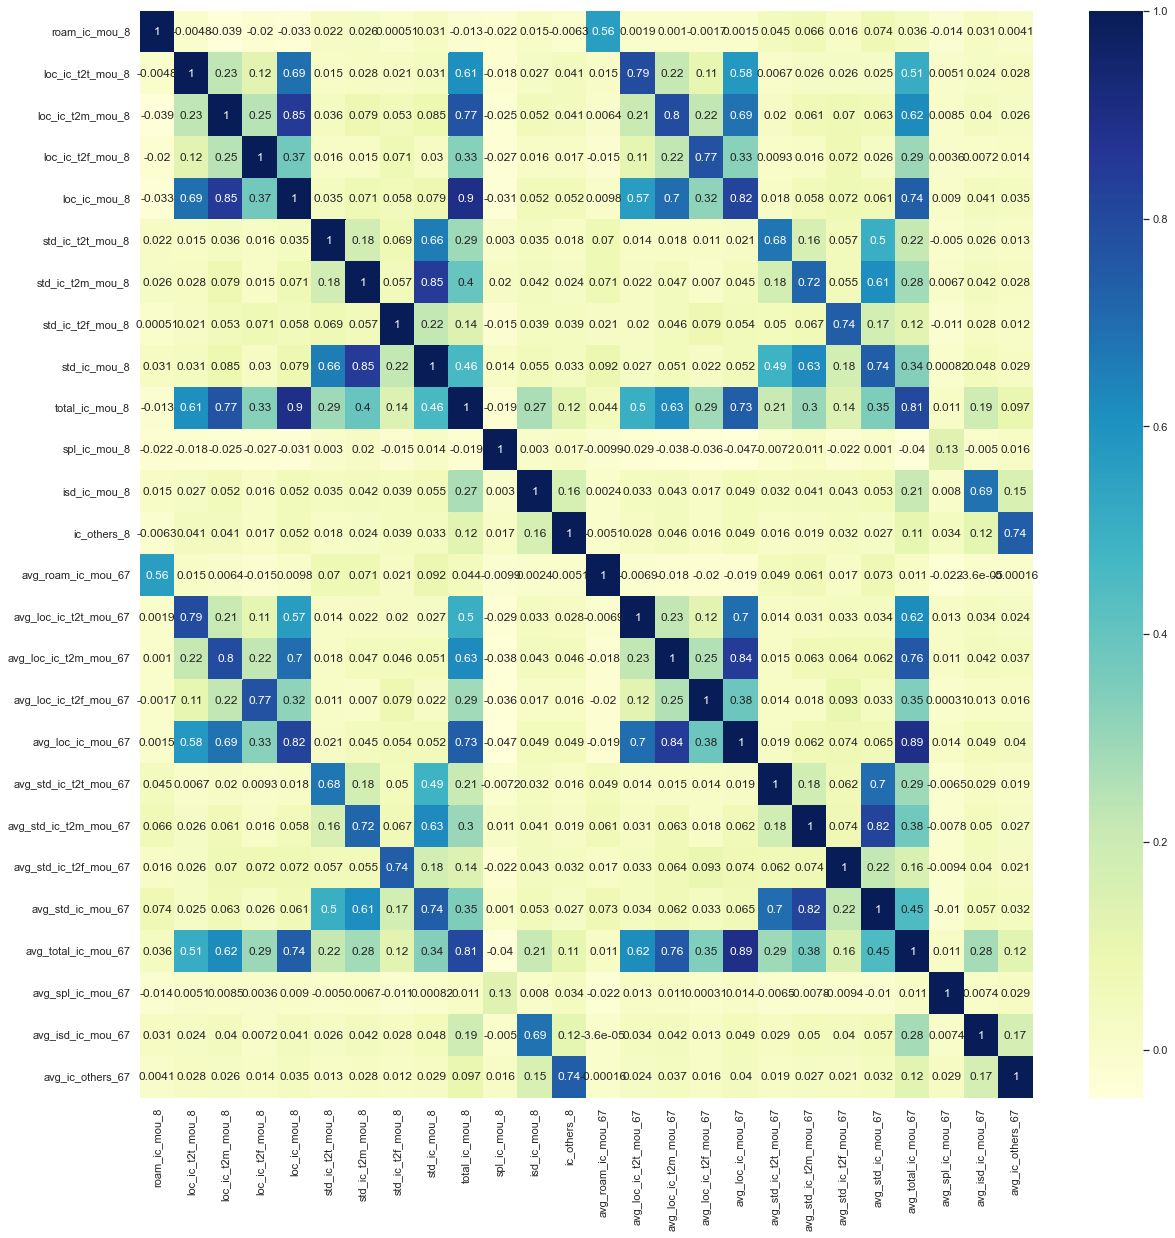

In [60]:
#Correlation
ic = [col for col in new_churn.columns if 'ic' in col]

plt.figure(figsize = [20,20])
sns.heatmap(new_churn[ic].corr(), cmap = "YlGnBu", annot = True)
plt.show()

In [61]:
#Dropping features which are having high corrletion that is more then 0.75
new_churn.drop(['loc_ic_mou_8',
                'avg_loc_ic_mou_67',
                'std_ic_t2m_mou_8',
                'avg_std_ic_mou_67',
                'avg_loc_ic_t2m_mou_67',
                'avg_loc_ic_t2t_mou_67',
                'avg_loc_ic_t2f_mou_67'], axis=1, inplace=True)
new_churn.shape

(29997, 73)

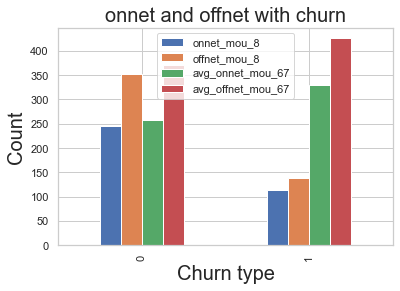

In [62]:
#plotting barplot for onnet and offnet columns
net_cols = [col for col in new_churn.columns if 'net' in col]
new_churn.groupby("Churn")[net_cols].mean().plot.bar() 
plt.title("onnet and offnet with churn",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Churn type",fontsize=20)
plt.show()

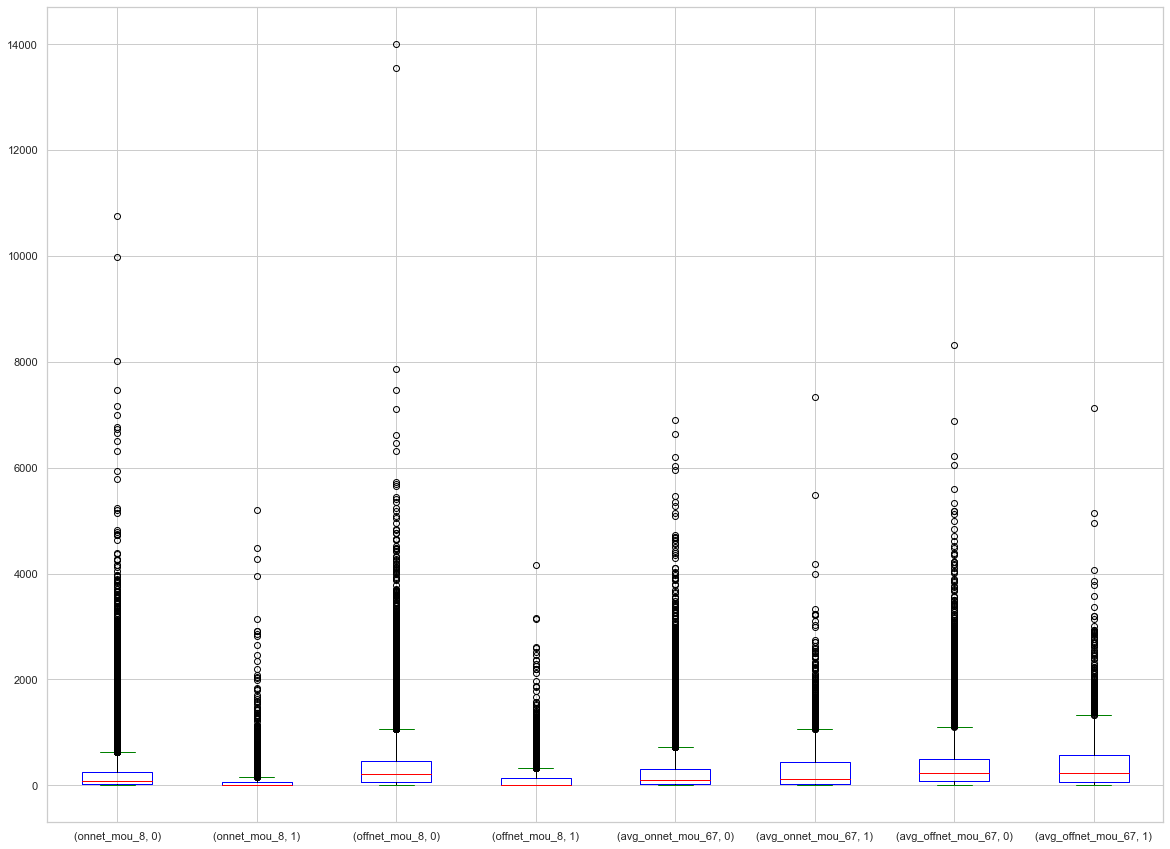

In [63]:
#box plot for the same
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 15))
ax=axes[0][0]

box_colors = {'boxes': 'blue', 'whiskers': 'black', 'medians': 'red', 'caps': 'green'}
new_churn.pivot(columns='Churn')[net_cols].plot(kind = 'box', ax=ax, color = box_colors)
plt.show()

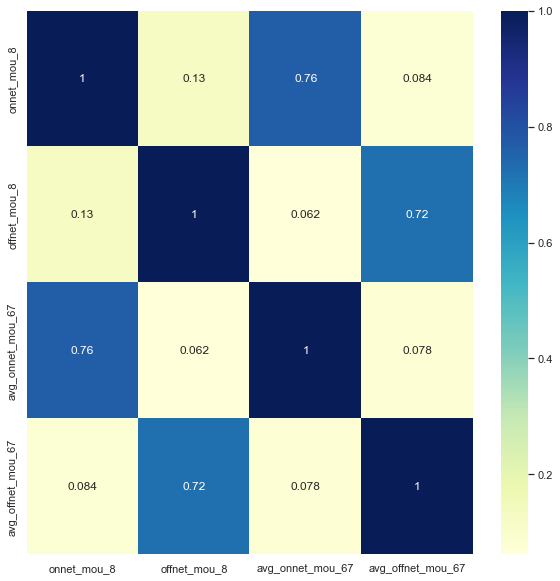

In [64]:
#Correlation
plt.figure(figsize = [10,10])
sns.heatmap(new_churn[net_cols].corr(), cmap = "YlGnBu", annot = True)
plt.show()

In [65]:
# Dropping column which is more than 0.75 correlation
new_churn.drop('avg_onnet_mou_67',axis=1,inplace=True)
new_churn.shape

(29997, 72)

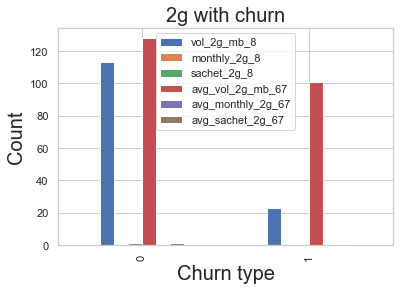

In [66]:
#plotting barplot for 2g columns
cols_2g = [col for col in new_churn.columns if '2g' in col]
new_churn.groupby("Churn")[cols_2g].mean().plot.bar() 
plt.title("2g with churn",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Churn type",fontsize=20)
plt.show()

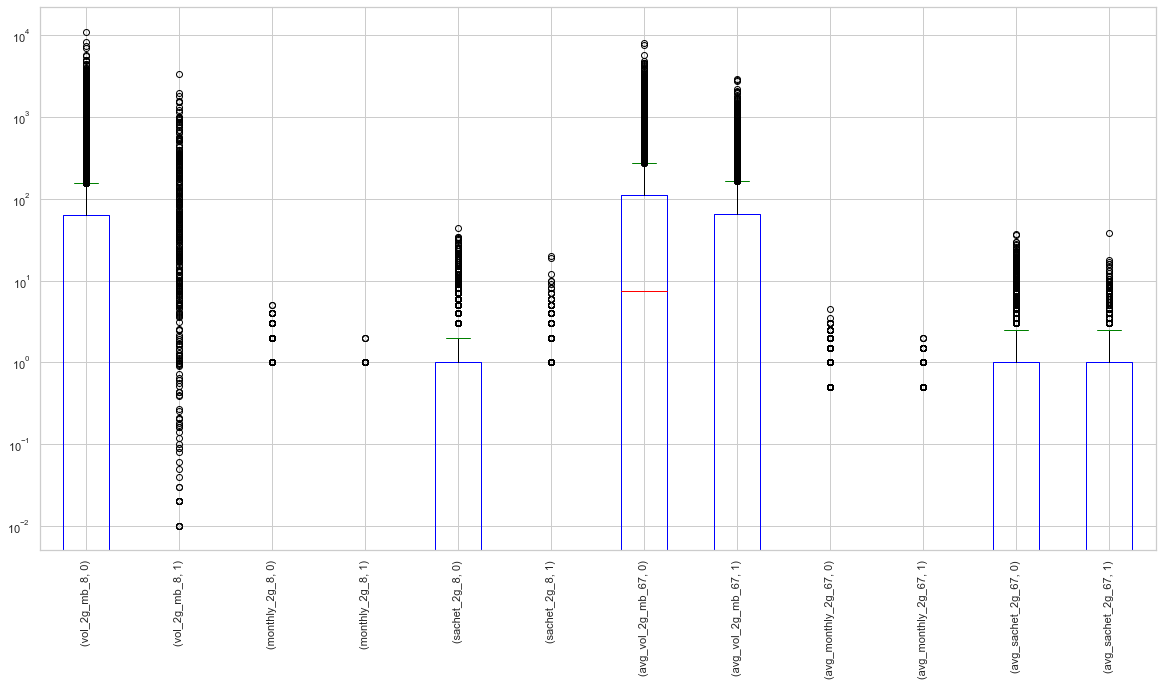

In [67]:
#box plot for the same
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

box_colors = {'boxes': 'blue', 'whiskers': 'black', 'medians': 'red', 'caps': 'green'}
new_churn.pivot(columns='Churn')[cols_2g].plot(kind = 'box', ax=ax, color = box_colors)
plt.yscale('log')
ax.xaxis.set_tick_params(rotation=90)
plt.show()

2g data usage is decreasing over the months for the churned customers

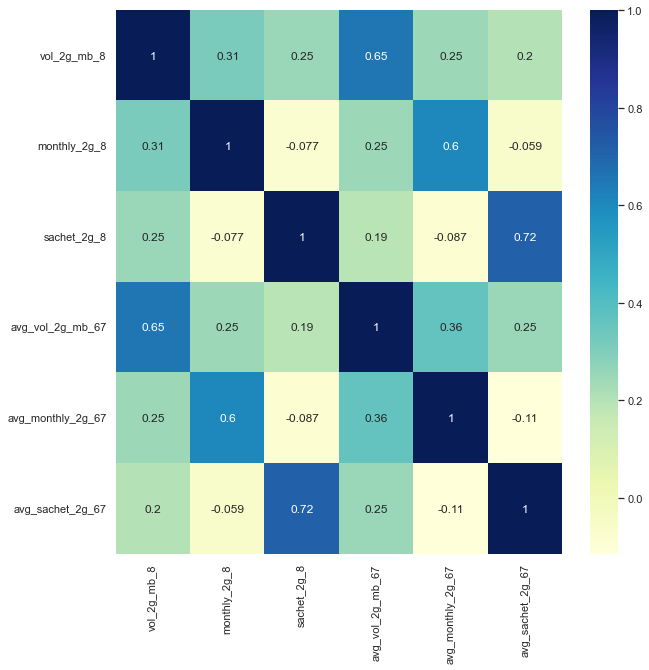

In [68]:
#Correlation
plt.figure(figsize = [10,10])
sns.heatmap(new_churn[cols_2g].corr(), cmap = "YlGnBu", annot = True)
plt.show()

In [69]:
#plotting barplot for onnet and offnet columns
cols_3g = [col for col in new_churn.columns if '3g' in col]
new_churn.groupby("Churn")[net_cols].mean().plot.bar() 
plt.title("3g with churn",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Churn type",fontsize=20)
plt.show()

KeyError: "Columns not found: 'avg_onnet_mou_67'"

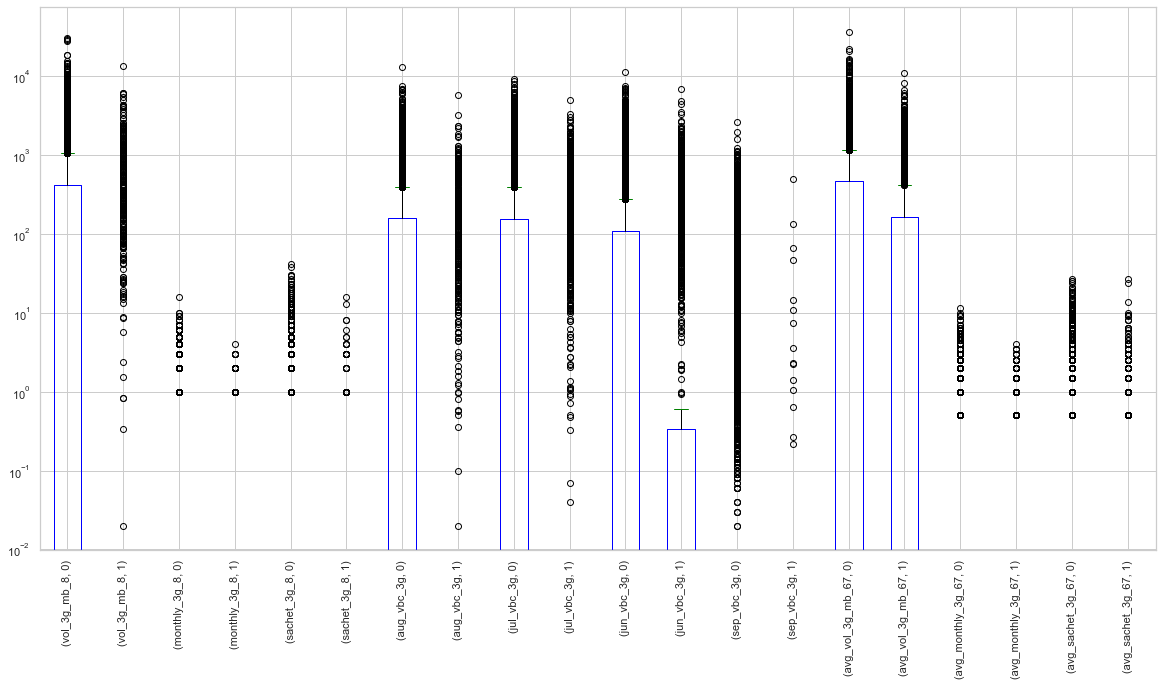

In [70]:
#box plot for the same
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

box_colors = {'boxes': 'blue', 'whiskers': 'black', 'medians': 'red', 'caps': 'green'}
new_churn.pivot(columns='Churn')[cols_3g].plot(kind = 'box', ax=ax, color = box_colors)
plt.yscale('log')
ax.xaxis.set_tick_params(rotation=90)
plt.show()

Same for the case of 3g data, this also decreasing

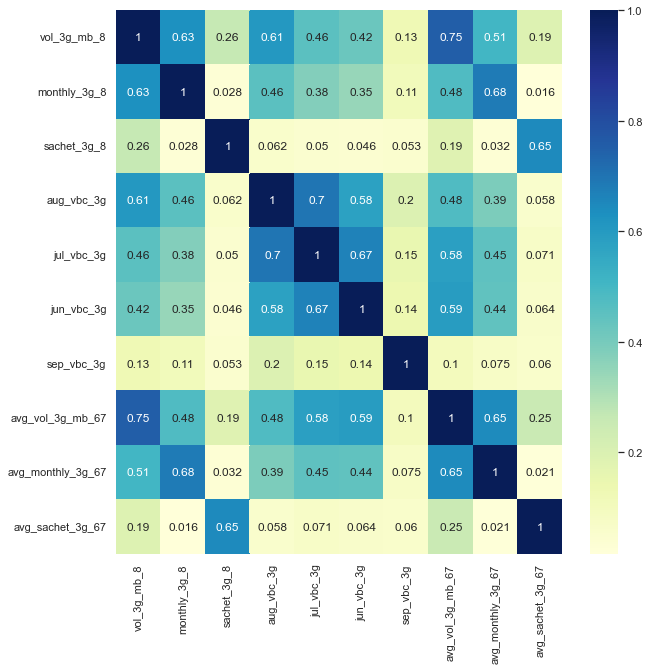

In [71]:
#Correlation
plt.figure(figsize = [10,10])
sns.heatmap(new_churn[cols_3g].corr(), cmap = "YlGnBu", annot = True)
plt.show()

In [72]:
new_churn.drop('avg_vol_3g_mb_67', axis = 1, inplace = True)
new_churn.shape

(29997, 71)

# Model Building

## Train- test split

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
#keeping the feature variable to X
X = new_churn.drop('Churn',axis=1)

#keeping the response variable to y
y = new_churn['Churn']

#Splitting the dataframe in the sizes of 70 and 30 respective the train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [75]:
X_train.shape
cols=X_train.columns

### As we have high imbalanced dataset we are performing oversampling with SMOTE

In [76]:
#!pip install imblearn

In [77]:
# SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100)
X_smt, y_smt = sm.fit_resample(X_train, y_train)

In [78]:
X_train = pd.DataFrame(X_smt)
y_train = pd.DataFrame(y_smt)

#renameing the columns
X_train.columns =cols
y_train= y_train.rename(columns={ 0 : 'Churn'})
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_total_rech_amt_67,avg_arpu_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_t2m_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67
0,592.623,4.84,98.06,31.11,9.86,4.84,0.00,1.10,24.66,0.00,13.26,0.00,54.01,1.10,0.0,93.04,46.11,105.54,2.18,0.0,0.00,57.56,266.61,0.0,55.19,0.00,3,658,229,200,0.0,0.0,0.00,0.00,0,0,0,0,3651,0.00,0.00,0.00,0.0,1186.5,998.3205,155.450,27.81,10.255,3.200,6.75,4.275,0.000,152.185,0.000,25.185,0.00,394.750,0.000,197.245,1.005,6.5,428.5,216.5,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,285.634,148.59,176.04,0.00,0.00,148.59,20.99,0.00,324.64,0.00,0.00,0.00,0.00,0.00,0.0,324.64,494.24,608.13,23.54,0.0,0.33,6.04,1131.98,0.0,0.00,0.00,5,250,250,0,0.0,0.0,0.00,0.00,0,0,0,0,2792,564.03,399.40,507.20,0.0,706.0,464.1135,157.430,0.00,0.000,10.565,3.06,10.565,0.000,289.795,0.395,1.095,0.00,836.110,0.000,0.000,0.000,4.0,301.0,251.0,1.0,203.0,425.80,0.5,0.0,0.5,0.0
2,668.330,83.24,1107.04,0.00,0.00,25.68,0.00,1.11,196.48,57.56,920.71,0.00,0.00,15.69,0.0,1190.46,48.48,198.79,0.91,0.0,0.00,28.43,276.63,0.0,0.00,0.00,5,676,169,169,0.0,0.0,0.00,0.00,0,0,0,0,1689,0.00,0.00,0.00,0.0,620.0,449.7650,836.420,0.00,0.000,2.305,716.50,2.305,0.225,953.625,10.630,48.610,4.79,298.445,0.000,0.000,0.000,7.5,169.0,139.5,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,705.440,697.44,555.04,22.81,23.56,633.89,18.96,2.38,1011.06,34.83,139.61,28.69,0.00,14.71,0.0,1228.93,1217.66,216.96,49.49,0.0,5.08,19.49,1503.63,0.0,0.00,0.00,10,650,130,130,0.0,0.0,0.00,0.00,0,0,0,0,1464,0.00,0.00,0.00,0.0,805.0,779.4150,335.445,19.88,16.755,0.000,82.67,15.970,0.000,1593.210,0.130,767.625,1.05,1044.720,0.075,0.000,0.000,11.5,120.0,55.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,264.205,23.89,81.66,0.00,0.00,12.01,3.58,0.00,93.68,11.88,0.00,0.00,0.00,1.50,0.0,107.06,236.61,189.46,56.99,0.0,0.00,0.00,496.44,0.0,0.00,13.36,6,304,154,30,1.0,154.0,57.56,392.11,1,0,0,0,279,262.76,406.66,121.27,0.0,670.5,447.7025,244.445,0.00,0.000,0.000,0.00,3.345,1.305,279.865,0.000,0.000,1.40,478.030,0.000,0.000,0.565,17.0,154.0,15.0,1.0,154.0,36.46,1.0,0.0,0.0,0.0


In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
#Scaling
scaler = StandardScaler()  
X1=X_train
XT1=X_test

col=X1.columns.tolist()
X1[col] = scaler.fit_transform(X1[col]) # scaling
XT1[col]= scaler.transform(XT1[col])
XT1.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_total_rech_amt_67,avg_arpu_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_t2m_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67
53991,0.493408,-0.089623,0.432151,-0.196723,-0.231197,-0.012098,0.457012,0.430120,0.934571,-0.067821,-0.229927,-0.117979,-0.081988,-0.054721,-0.021168,0.272952,0.608271,2.846765,0.134818,5.391055,-0.063712,5.734652,3.985951,-0.15345,-0.140831,-0.088169,-0.059499,0.551524,0.473729,1.054426,-0.019878,0.571992,3.662437,-0.294740,2.933622,-0.324367,-0.268597,-0.143419,-0.946650,-0.317433,-0.354425,-0.350995,-0.118678,-0.018262,-0.168579,-0.184059,-0.232827,-0.284109,-0.333214,-0.321813,-0.425393,-0.198363,-0.397695,6.367178,1.055665,-0.024824,2.659402,-0.446998,-0.176751,-0.094925,-0.907718,1.257641,-0.158186,-0.041488,0.719536,2.128775,4.266828,-0.472322,-0.386047,-0.214521
8279,-0.699565,-0.409463,-0.568227,-0.155939,-0.187827,-0.264421,-0.247477,0.235072,-0.492964,-0.320821,-0.344521,-0.117979,-0.081988,-0.125033,-0.021168,-0.612492,-0.272372,-0.508006,-0.264361,0.130410,-0.111504,-0.116938,-0.509221,-0.15345,-0.140831,-0.088169,-0.059499,-0.675685,-0.563936,-0.511122,0.812001,-0.025224,0.449486,-0.294740,-0.270788,0.694506,-0.268597,0.995721,-0.363504,-0.317433,-0.354425,-0.350995,-0.118678,-0.188965,-1.146921,-0.745983,-0.196394,-0.218180,2.669521,-0.503599,0.621730,-0.198363,-0.906040,-0.207970,-0.331343,-0.162484,-0.645229,-0.446998,-0.176751,-0.094925,-0.126467,-0.907749,-0.723517,1.464138,-0.138278,0.461164,-0.402845,1.959903,-0.386047,-0.214521
61559,-0.078490,-0.430947,-0.508209,-0.196723,-0.231197,-0.276070,-0.247477,1.060776,-0.459754,-0.327253,-0.344521,-0.117979,-0.081988,0.694102,-0.021168,-0.577852,-0.314661,-0.370136,-0.264361,-0.169533,0.111281,-0.195647,-0.473579,-0.15345,-0.140831,-0.088169,2.274487,-0.057172,-0.594456,-0.315428,5.803279,1.766424,-0.185958,1.374653,-0.270788,7.317176,-0.268597,-0.143419,0.394810,1.288426,0.400443,0.119575,-0.118678,-0.053772,-1.205207,-0.763449,-0.232827,-0.284109,-0.333214,-0.503967,0.053227,-0.198363,-0.925706,-0.230093,-0.265769,-0.082686,-0.599345,-0.446998,-0.176751,-0.094925,-0.066371,-0.924535,-0.636189,1.652341,0.196854,-0.081213,-0.402845,2.181014,-0.386047,-0.214521
49668,-0.345297,0.004027,-0.411940,0.846523,1.659925,-0.281169,-0.247477,-0.208663,-0.465345,-0.295924,-0.342629,-0.117979,-0.081988,-0.284993,-0.021168,-0.588696,-0.319108,-0.515386,-0.264361,-0.169533,-0.111504,-0.264038,-0.585781,-0.15345,-0.140831,-0.088169,-0.428024,-0.636414,-0.441858,-0.511122,-0.435818,-0.473135,-0.269309,-0.294740,-0.270788,-0.324367,-0.268597,-0.143419,-0.658467,-0.317433,-0.354425,-0.350995,-0.118678,0.083988,0.814731,0.054356,-0.232827,-0.284109,0.276636,0.097863,-0.089620,-0.198363,1.835765,0.247978,-0.026392,-0.162484,-0.163272,6.002641,0.264353,-0.077995,0.654784,-0.494814,-0.047878,-0.417895,-0.156725,-0.413785,-0.402845,-0.472322,0.622934,-0.214521
93509,-0.591087,-0.403703,-0.207949,-0.027434,-0.169828,-0.226752,-0.143837,-0.208663,-0.451451,-0.321507,0.0668

## PCA

In [81]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)
pca.fit(X1[col])

PCA(random_state=100)

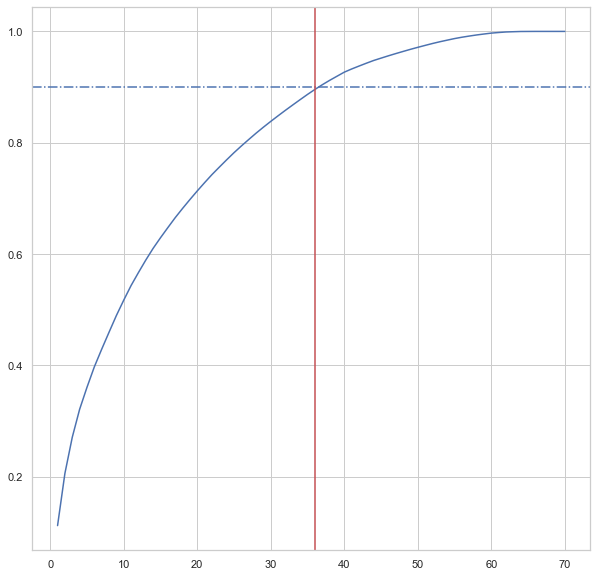

In [82]:
# Plotting the cumulative varoiance
plt.figure(figsize = [10,10])
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.axhline(y=.90, color='b', linestyle='-.')
plt.axvline(x=36, color='r', linestyle='-')
plt.show()

This tells us that PCA with about 36 can explain about 90% of the variance

In [83]:
#Now selecting 4 PCs for further analysis
pc = PCA(n_components=36, random_state=100) 
new_data = pc.fit_transform(X1[col])
new_data.shape

(38554, 36)

In [84]:
#Now creating a dataframe of the PCs
df_train_pca = pd.DataFrame(new_data) 
df_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.983699,-0.111993,-2.750753,0.513765,1.530718,-0.035573,-1.261901,-0.673979,1.727507,1.299764,1.834919,-1.738611,-1.207916,-1.808427,0.686622,-0.778642,-0.450203,0.288792,0.539614,-0.138952,-0.785764,-0.432006,-0.877093,0.955499,-0.318896,1.877954,-0.479987,0.334500,0.558287,-0.374257,0.894973,0.386677,0.124566,-0.258605,-0.113943,-0.021239
1,2.156519,1.624522,-2.163117,3.889161,-0.657834,-1.010126,-1.562219,0.671157,0.797502,-1.006823,-2.163284,-0.401992,-0.762878,0.600552,-0.199727,0.156232,-0.960146,0.565459,-0.886367,-0.412089,0.262519,-1.444490,0.142229,1.919707,0.012125,0.284615,-0.071524,-0.877665,0.631367,0.361177,0.501830,1.252956,-0.688607,-0.807726,-0.990755,-0.682460
2,1.808735,-2.403368,-0.276564,-0.273596,-0.782849,-0.172950,-1.011154,-0.044952,-1.165955,-0.582266,0.699313,-1.113806,1.378033,0.270237,0.394991,-0.047000,-1.406511,-0.179775,-0.044040,0.536995,-0.254823,-0.700053,0.474544,0.382383,-0.034829,0.355093,0.060766,0.273982,0.089176,0.280666,0.312469,-0.076764,0.098073,-0.263347,0.067140,-0.101334
3,5.877406,-2.195650,-0.511747,7.030200,0.226129,0.575301,-1.053058,-1.238861,0.431284,-1.922051,-3.852245,1.059896,-0.507953,0.670587,-0.697588,-0.326424,-0.647435,-3.484000,-0.618848,-1.276390,0.390311,-3.900297,-1.583704,-4.067100,-0.683755,-0.973289,-1.302926,-3.659491,3.826724,-1.278609,0.103705,3.366576,1.869146,-0.329848,-0.847832,-0.088990
4,-0.130389,1.271029,-0.707600,2.122775,-0.791007,-0.614992,-0.824830,1.522731,-1.079103,1.161437,-1.069154,0.996597,-0.604225,0.425082,1.666193,0.535480,1.017947,0.593944,-0.750079,0.201206,-0.354543,-0.571147,0.513661,0.073088,-0.898027,-1.725662,0.438270,0.100674,0.215507,-1.211096,-0.324459,0.103437,-0.431036,0.670156,-0.350009,0.389764


In [85]:
df_train_pca.shape

(38554, 36)

In [86]:
test_data = pc.transform(XT1[col])
df_test_pca = pd.DataFrame(test_data)
df_test_pca.shape

(9000, 36)

In [87]:
df_test_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,4.304268,1.526769,-0.772954,7.103658,1.579133,4.410461,3.940869,3.845298,-4.403691,1.378967,-1.002234,-3.429051,-2.323316,1.928668,0.566409,0.338989,0.616064,-0.875679,-0.223634,1.059430,-1.281351,1.549296,0.839409,1.685282,0.752963,-1.152687,0.512106,-0.145354,-0.929733,0.489852,-0.375345,-0.955077,-0.454517,0.606242,0.269519,0.262580
1,-2.887505,0.970103,2.311390,0.463732,0.800285,-0.135842,0.165388,1.022476,1.013662,-0.606705,0.333777,-0.639154,0.601072,0.007138,-0.395280,-0.644652,-0.576611,-0.001027,0.195587,0.128005,-0.232730,0.201508,-0.167679,-0.170473,-0.105088,-0.330211,-0.207251,0.438354,0.414244,0.451904,0.124145,0.544779,-1.476494,-0.828939,-0.527432,-0.182777
2,-1.242270,4.288910,5.739066,0.465963,2.081321,-0.907650,0.115242,-0.158335,-0.269288,-0.447550,0.573952,-0.882547,4.008879,-1.276757,-0.551552,-2.564395,1.375803,1.002422,2.300717,-2.260675,1.011289,-0.321859,-0.925346,0.899660,-2.425867,-0.517450,0.966663,-0.397679,-0.802311,-0.945879,0.671619,-0.001973,0.457848,0.046075,-0.123704,0.247698
3,-1.055383,-1.553079,-0.098185,-1.212699,-0.205332,0.914525,-0.151932,-0.028017,0.929081,0.785097,-0.503766,0.703814,-0.827412,-0.662248,-1.422302,2.846671,1.648818,-1.488053,-0.071690,-1.482241,0.941027,1.060230,-0.026090,-0.235161,0.569493,-1.070998,-0.883198,0.879304,-1.653632,0.964178,2.102291,1.258200,1.988743,-0.926330,-0.223046,1.095168
4,-1.917948,-1.546450,-0.830696,-0.413598,-0.667713,0.530961,-0.346868,-0.430301,-0.654882,-0.275879,0.235006,-0.188278,0.357119,0.266075,0.399914,-0.384226,-0.186991,-0.208067,0.312733,-0.293194,0.093542,0.152874,-0.154816,0.177172,0.099598,-0.192304,0.414474,-0.044130,0.489790,0.045547,0.124274,-0.041472,-0.019059,0.194039,0.422280,0.009177


## Random Forest with PCA

In [132]:
#Creating the parameter grid based on the results of  the random search 
param_grid = {
    'max_depth': [10,12,15],
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 200, 50),
    'n_estimators': [100,150,200], 
    'max_features': [3,5, 8]
}

rf = RandomForestClassifier()

#Instantiating the grid_search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [133]:
# Fit the grid search to the data
# commented as it takes long time
grid_search.fit(df_train_pca, y_train) 

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 12, 15], 'max_features': [3, 5, 8],
                         'min_samples_leaf': range(50, 200, 50),
                         'min_samples_split': range(50, 200, 50),
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [134]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8685740207079814 using {'max_depth': 15, 'max_features': 8, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 150}


In [135]:
#Now fitting the final model with the best parameters which is obtained from the grid_search
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=15,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=8,
                             n_estimators=100)

In [136]:
#itting
rfc.fit(df_train_pca, y_train)

#making predictions
predictions = rfc.predict(df_test_pca)
y_pred = rfc.predict_proba(df_test_pca)

In [137]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

conf = metrics.confusion_matrix(y_test, predictions )
conf

array([[7438,  841],
       [ 185,  536]], dtype=int64)

In [138]:
TP = conf[1,1] # true positive 
TN = conf[0,0] # true negatives
FP = conf[0,1] # false positives
FN = conf[1,0] # false negatives

# Printing other performance metrics
print('Sensitivity/ Recall                  = ', TP / float(TP+FN))
print('Specificity                          = ',TN / float(TN+FP))
print('false positive rate                  = ',FP/ float(TN+FP))
print ('Positive predictive value/Precision  = ',TP / float(TP+FP))
print ('Negative predictive value            = ', TN / float(TN+FN))

Sensitivity/ Recall                  =  0.7434119278779473
Specificity                          =  0.898417683295084
false positive rate                  =  0.10158231670491605
Positive predictive value/Precision  =  0.38925199709513436
Negative predictive value            =  0.975731339367703


In [139]:
#evaluating of predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 89.89%


## Logistic Regression with PCA

In [88]:
#Initialization for logistic regression
logreg = LogisticRegression()

In [89]:
# Building Logistic Model
X1_train_sm = stm.add_constant(df_train_pca)
log_m1 = stm.GLM(y_train,X1_train_sm, family = stm.families.Binomial())
res1 = log_m1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38554
Model:                            GLM   Df Residuals:                    38517
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15659.
Date:                Fri, 16 Feb 2024   Deviance:                       31317.
Time:                        10:18:38   Pearson chi2:                 9.11e+09
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4585      0.022    -20.622      0.000      -0.502      -0.415
0             -0.6612      0.010    -65.364      0.000      -0.681      -0.641
1             -0.4004      0.009    -43.465      0.000      -0.418      -0.382
2             -0.3249      0.012    -26.756      0.000      -0.349      -0.301
3             -0.6375      0.014    -46.822      0.000      -0.664      -0.611
4              0.0607      0.011      5.542      0.000       0.039       0.082
5              0.4284      0.014     30.431      0.000       0.401       0.456
6              0.0510      0.016      3.100      0.002       0.019       0.083
7             -0.1581      0.013    -12.337      0.000      -0.183      -0.133
8              0.2192      0.021     10.331      0.000       0.178       0.261
9             -0.0071      0.016     -0.432      0.666      -0.039       0.025
10             0.0943      0.017      5.405      0.000       0.060       0.129
11            -0.1473      0.026     -5.632      0.000      -0.199      -0.096
12            -0.6913      0.021    -33.380      0.000      -0.732      -0.651
13            -0.0734      0.032     -2.293      0.022      -0.136      -0.011
14            -0.4640      0.035    -13.180      0.000      -0.533      -0.395
15            -0.2113      0.022     -9.465      0.000      -0.255      -0.168
16            -0.5967      0.064     -9.254      0.000      -0.723      -0.470
17            -0.0341      0.035     -0.981      0.327      -0.102       0.034
18            -1.6283      0.161    -10.091      0.000      -1.945      -1.312
19            -1.9316      0.269     -7.168      0.000      -2.460      -1.403
20            -1.3358      0.179     -7.455      0.000      -1.687      -0.985
21             0.9730      0.116      8.376      0.000       0.745       1.201
22             1.5969      0.244      6.553      0.000       1.119       2.075
23            -0.7783      0.115     -6.774      0.000      -1.003      -0.553
24            -1.5102      0.154     -9.822      0.000      -1.811      -1.209
25             0.7436      0.118      6.308      0.000       0.513       0.975
26             0.7198      0.089      8.129      0.000       0.546       0.893
27            -0.3222      0.056     -5.704      0.000      -0.433      -0.211
28            -0.1311      0.029     -4.581      0.000      -0.187      -0.075
29             0.3269      0.032     10.295      0.000       0.265       0.389
30             0.2159      0.032      6.805      0.000       0.154       0.278
31             0.4998      0.054      9.235      0.000       0.394       0.606
32             0.1407      0.030      4.719      0.000       0.082       0.199
33             0.2993      0.046      6.473      0.000       0.209       0.390
34             0.2744      0.030      9.047      0.000       0.215       0.334
35

In [90]:
y_train_pred = res1.predict(X1_train_sm).values.reshape(-1)

In [91]:
#Creating a dataframe with the actual churn flag and predicted probabilities
y_train_pred_final = pd.DataFrame({'Churned':y_smt, 'Churn_Prob':y_train_pred})
y_train_pred_final['ind']=y_train_pred_final.index
y_train_pred_final.head()

,Churned,Churn_Prob,ind
0,0,0.709501,0
1,0,0.017588,1
2,0,0.193863,2
3,0,0.003956,3
4,0,0.059818,4


In [92]:
#Now creating columns with differnet cutoffs probability
num = [ float(x)/10 for x in range(10) ]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churned,Churn_Prob,ind,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.709501,0,1,1,1,1,1,1,1,1,0,0
1,0,0.017588,1,1,0,0,0,0,0,0,0,0,0
2,0,0.193863,2,1,1,0,0,0,0,0,0,0,0
3,0,0.003956,3,1,0,0,0,0,0,0,0,0,0
4,0,0.059818,4,1,0,0,0,0,0,0,0,0,0


In [93]:
#Now calculating the accuracy, sensitivity and specificity for mentioned probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

#from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.693443  0.976656  0.410230
0.2   0.2  0.752295  0.951497  0.553094
0.3   0.3  0.789386  0.924003  0.654770
0.4   0.4  0.811044  0.888987  0.733102
0.5   0.5  0.828215  0.851066  0.805364
0.6   0.6  0.832754  0.800384  0.865124
0.7   0.7  0.819033  0.724646  0.913420
0.8   0.8  0.774965  0.600093  0.949837
0.9   0.9  0.608912  0.233335  0.984489


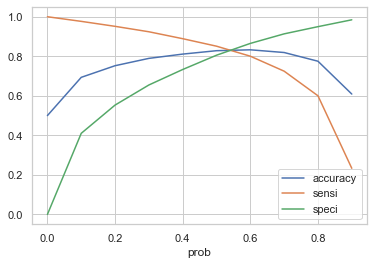

In [94]:
#Plotting the cutoffs
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [95]:
#Creating new column 'predicted' with 1 if conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x >= 0.5 else 0)
y_train_pred_final.head()

,Churned,Churn_Prob,ind,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.709501,0,1,1,1,1,1,1,1,1,0,0,1
1,0,0.017588,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.193863,2,1,1,0,0,0,0,0,0,0,0,0
3,0,0.003956,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.059818,4,1,0,0,0,0,0,0,0,0,0,0


In [96]:
from sklearn.metrics import precision_recall_curve

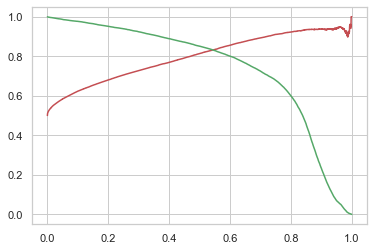

In [97]:
y_train_pred_final.Churned, y_train_pred_final.predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churned, y_train_pred_final.Churn_Prob)
plt.plot(thresholds, p[:-1], "r-")
plt.plot(thresholds, r[:-1], "g-")
plt.show()

### Evaluating model performance

In [98]:
#Overall accuracy.
print("Overall accuracy is: ",metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

#Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

Overall accuracy is:  0.8282149712092131
[[15525  3752]
 [ 2871 16406]]


In [99]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Printing other performance metrics
print('Sensitivity/ Recall                  = ', TP / float(TP+FN))
print('Specificity                          = ',TN / float(TN+FP))
print('False positive rate                  = ',FP/ float(TN+FP))
print ('Positive predictive value/Precision  = ',TP / float(TP+FP))
print ('Negative predictive value            = ', TN / float(TN+FN))

Sensitivity/ Recall                  =  0.8510660372464595
Specificity                          =  0.8053639051719665
False positive rate                  =  0.1946360948280334
Positive predictive value/Precision  =  0.8138704236531402
Negative predictive value            =  0.8439334637964775


In [100]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

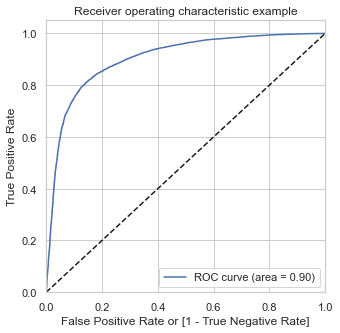

In [101]:
#Finding the ROC curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churned, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churned, y_train_pred_final.Churn_Prob)

In [102]:
X_test_sm = stm.add_constant(df_test_pca)

#Making predictions on the test set
y_test_pred = res1.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
0,0.001516
1,0.419917
2,0.004097
3,0.975642
4,0.845366


In [103]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,53991,0.001516
1,1,8279,0.419917
2,0,61559,0.004097
3,1,49668,0.975642
4,1,93509,0.845366


In [104]:
#Making final prediction

y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,Churn,CustID,Churn_Prob,final_predicted
0,0,53991,0.001516,0
1,1,8279,0.419917,0
2,0,61559,0.004097,0
3,1,49668,0.975642,1
4,1,93509,0.845366,1


In [105]:
#Overall accuracy
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.8126666666666666

In [106]:
#Confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[6712, 1567],
       [ 119,  602]], dtype=int64)

In [107]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Printing other performance meterics
print('Sensitivity/ Recall                  = ', TP / float(TP+FN))
print('Specificity                          = ',TN / float(TN+FP))
print('false positive rate                  = ',FP/ float(TN+FP))
print ('Positive predictive value/Precision  = ',TP / float(TP+FP))
print ('Negative predictive value            = ', TN / float(TN+FN))

Sensitivity/ Recall                  =  0.8349514563106796
Specificity                          =  0.8107259330837058
false positive rate                  =  0.18927406691629423
Positive predictive value/Precision  =  0.27754725680036885
Negative predictive value            =  0.982579417362026


In [108]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Churn, y_pred_final.Churn_Prob, drop_intermediate = False )

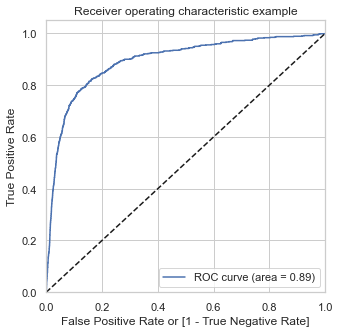

In [109]:
draw_roc(y_pred_final.Churn, y_pred_final.Churn_Prob)

## Logistic regression with RFE

In [112]:
from sklearn.feature_selection import RFE

In [110]:
#Initial model with  has all the features

X_train_sm = stm.add_constant(X1)
log_m = stm.GLM(y_train,X_train_sm, family = stm.families.Binomial())
res = log_m.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38554
Model:                            GLM   Df Residuals:                    38484
Model Family:                Binomial   Df Model:                           69
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10617.
Date:                Fri, 16 Feb 2024   Deviance:                       21233.
Time:                        10:19:16   Pearson chi2:                 7.20e+08
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2892.4129   9.14e+04      0.032      0.975   -1.76e+05    1.82e+05
arpu_8                      0.6161      0.085      7.277      0.000       0.450       0.782
onnet_mou_8                 1.7578      1.204      1.460      0.144      -0.602       4.118
offnet_mou_8                1.4575      1.242      1.173      0.241      -0.977       3.892
roam_ic_mou_8              -0.0851      0.028     -3.015      0.003      -0.140      -0.030
roam_og_mou_8              -0.4589      0.352     -1.303      0.193      -1.149       0.231
loc_og_t2t_mou_8            0.2643      0.100      2.634      0.008       0.068       0.461
loc_og_t2f_mou_8            0.0353      0.026      1.380      0.168      -0.015       0.085
loc_og_t2c_mou_8            0.1166      0.023      5.121      0.000       0.072       0.161
loc_og_mou_8             7843.2336    811.045      9.671      0.000    6253.614    9432.854
std_og_t2t_mou_8         9299.2272    961.534      9.671      0.000    7414.654    1.12e+04
std_og_t2m_mou_8         9130.1422    944.029      9.671      0.000    7279.878     1.1e+04
std_og_t2f_mou_8          221.5636     22.911      9.670      0.000     176.658     266.469
isd_og_mou_8              487.0771     50.383      9.667      0.000     388.327     585.827
spl_og_mou_8              453.7092     46.908      9.672      0.000     361.771     545.647
og_others_8                16.1083      2.126      7.577      0.000      11.941      20.275
total_og_mou_8          -1.652e+04   1708.185     -9.674      0.000   -1.99e+04   -1.32e+04
loc_ic_t2t_mou_8         7000.0751    298.153     23.478      0.000    6415.706    7584.444
loc_ic_t2m_mou_8         1.012e+04    431.215     23.479      0.000    9279.251     1.1e+04
loc_ic_t2f_mou_8         1918.5013     81.719     23.477      0.000    1758.335    2078.668
std_ic_t2t_mou_8           -0.2316      0.066     -3.495      0.000      -0.361      -0.102
std_ic_t2f_mou_8           -0.1149      0.055     -2.095      0.036      -0.222      -0.007
std_ic_mou_8             6199.2367    264.028     23.479      0.000    5681.751    6716.722
total_ic_mou_8          -1.717e+04    731.178    -23.481      0.000   -1.86e+04   -1.57e+04
spl_ic_mou_8                6.0967      0.268     22.739      0.000       5.571       6.622
isd_ic_mou_8             2919.1301    124.322     23.480      0.000    2675.464    3162.796
ic_others_8               543.0321     23.122     23.485      0.000     497.714     588.351
total_rech_num_8           -0.6312      0.042    -15.103      0.000      -0.713      -0.549
total_rech_amt_8           -0.0318      0.089     -0.358      0.721      -0.206       0.143
max_rech_amt_8              0.1212      0.039      3.116      0.002       0.045       0.197
last_day_rch_amt_8         -0.4794      0.030  

In [113]:
logreg = LogisticRegression()

rfe = RFE(logreg,20)             #RFE with 20 variables 
rfe = rfe.fit(X1, y_train)

In [114]:
#Checking the attribute names after RFE
rfe_cols = X1.columns[rfe.support_]
rfe_cols

Index(['onnet_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'sep_vbc_3g', 'avg_arpu_67',
       'avg_total_ic_mou_67', 'avg_total_rech_num_67'],
      dtype='object')

In [115]:
X1_train_sm = stm.add_constant(X1[rfe_cols])
log_m1 = stm.GLM(y_train,X1_train_sm, family = stm.families.Binomial())
res1 = log_m1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38554
Model:                            GLM   Df Residuals:                    38533
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11433.
Date:                Fri, 16 Feb 2024   Deviance:                       22866.
Time:                        10:20:53   Pearson chi2:                 3.35e+09
No. Iterations:                    58                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3157.4107   9.23e+04      0.034      0.973   -1.78e+05    1.84e+05
onnet_mou_8               0.8594      0.089      9.655      0.000       0.685       1.034
loc_og_mou_8             -0.7604      0.057    -13.337      0.000      -0.872      -0.649
std_og_t2t_mou_8         -0.6931      0.084     -8.232      0.000      -0.858      -0.528
og_others_8              -1.3912      0.931     -1.494      0.135      -3.216       0.434
total_og_mou_8           -0.4212      0.040    -10.556      0.000      -0.499      -0.343
loc_ic_t2t_mou_8         -0.2636      0.080     -3.292      0.001      -0.421      -0.107
loc_ic_t2m_mou_8         -0.1211      0.084     -1.437      0.151      -0.286       0.044
total_ic_mou_8           -1.7788      0.103    -17.209      0.000      -1.981      -1.576
total_rech_num_8         -0.7278      0.034    -21.221      0.000      -0.795      -0.661
last_day_rch_amt_8       -0.3342      0.021    -16.058      0.000      -0.375      -0.293
total_rech_data_8       1.11e+05   3.24e+06      0.034      0.973   -6.24e+06    6.46e+06
vol_2g_mb_8              -0.4486      0.063     -7.119      0.000      -0.572      -0.325
monthly_2g_8          -1.441e+04   4.21e+05     -0.034      0.973   -8.39e+05     8.1e+05
sachet_2g_8            -9.06e+04   2.65e+06     -0.034      0.973   -5.28e+06     5.1e+06
monthly_3g_8          -2.272e+04   6.64e+05     -0.034      0.973   -1.32e+06    1.28e+06
sachet_3g_8           -4.052e+04   1.18e+06     -0.034      0.973   -2.36e+06    2.28e+06
sep_vbc_3g               -1.2442      0.133     -9.340      0.000      -1.505      -0.983
avg_arpu_67               0.4350      0.025     17.463      0.000       0.386       0.484
avg_total_ic_mou_67       0.5629      0.040     14.245      0.000       0.485       0.640
avg_total_rech_num_67     0.2786      0.028      9.922      0.000       0.224       0.334
=========================================================================================
"""

In [116]:
y_train_pred = res1.predict(X1_train_sm).values.reshape(-1)

In [117]:
#Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churned':y_smt, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train_pred_final.index
y_train_pred_final.head()

,Churned,Churn_Prob,CustID
0,0,0.617275,0
1,0,0.002208,1
2,0,0.158543,2
3,0,0.000024,3
4,0,0.009365,4


In [118]:
#Creating columns which has different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churned,Churn_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.617275,0,1,1,1,1,1,1,1,0,0,0
1,0,0.002208,1,1,0,0,0,0,0,0,0,0,0
2,0,0.158543,2,1,1,0,0,0,0,0,0,0,0
3,0,0.000024,3,1,0,0,0,0,0,0,0,0,0
4,0,0.009365,4,1,0,0,0,0,0,0,0,0,0


In [119]:
#Now calculating the accuracy, sensitivity and specificity for mentioned probability cutoffs.
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.783732  0.977590  0.589874
0.2   0.2  0.825232  0.961664  0.688800
0.3   0.3  0.852000  0.944753  0.759247
0.4   0.4  0.869560  0.923795  0.815324
0.5   0.5  0.882295  0.899362  0.865228
0.6   0.6  0.886652  0.872646  0.900659
0.7   0.7  0.882814  0.834155  0.931473
0.8   0.8  0.847876  0.732323  0.963428
0.9   0.9  0.712974  0.437101  0.988847


In [120]:
#PLOT
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

<AxesSubplot:xlabel='prob'>

In [121]:
# Creating new column 'predicted' with 1 if conversion_Prob > 0.6 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x >= 0.5 else 0)
y_train_pred_final.head()

,Churned,Churn_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.617275,0,1,1,1,1,1,1,1,0,0,0,1
1,0,0.002208,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.158543,2,1,1,0,0,0,0,0,0,0,0,0
3,0,0.000024,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.009365,4,1,0,0,0,0,0,0,0,0,0,0


### Evaluting the performance

In [122]:
#Overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

0.8822949629091663
[[16679  2598]
 [ 1940 17337]]


In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#Printing other performance metrics
print('Sensitivity/ Recall                  = ', TP / float(TP+FN))
print('Specificity                          = ',TN / float(TN+FP))
print('false positive rate                  = ',FP/ float(TN+FP))
print ('Positive predictive value/Precision  = ',TP / float(TP+FP))
print ('Negative predictive value            = ', TN / float(TN+FN))

Sensitivity/ Recall                  =  0.8993619339108783
Specificity                          =  0.8652279919074545
false positive rate                  =  0.13477200809254553
Positive predictive value/Precision  =  0.8696764484574868
Negative predictive value            =  0.8958053601160105


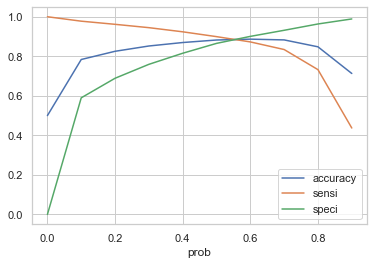

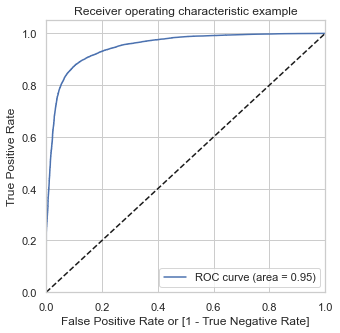

In [124]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churned, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churned, y_train_pred_final.Churn_Prob)

#### Making Predictions

In [125]:
X_test_sm = stm.add_constant(XT1[rfe_cols])

#Making predictions on the test set
y_test_pred = res1.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
53991,0.000004
8279,0.099902
61559,0.000002
49668,0.948798
93509,0.752744


In [126]:
y_test_df = pd.DataFrame(y_test)

y_test_df['CustID'] = y_test_df.index

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,53991,0.000004
1,1,8279,0.099902
2,0,61559,0.000002
3,1,49668,0.948798
4,1,93509,0.752744


In [127]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,Churn,CustID,Churn_Prob,final_predicted
0,0,53991,0.000004,0
1,1,8279,0.099902,0
2,0,61559,0.000002,0
3,1,49668,0.948798,1
4,1,93509,0.752744,1


In [128]:
#Overall accuracy.
print(metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted))
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
print(confusion)

0.8615555555555555
[[7200 1079]
 [ 167  554]]


In [129]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#Printing other performance metrics
print('Sensitivity/ Recall                  = ', TP / float(TP+FN))
print('Specificity                          = ',TN / float(TN+FP))
print('false positive rate                  = ',FP/ float(TN+FP))
print ('Positive predictive value/Precision  = ',TP / float(TP+FP))
print ('Negative predictive value            = ', TN / float(TN+FN))

Sensitivity/ Recall                  =  0.768377253814147
Specificity                          =  0.8696702500301969
false positive rate                  =  0.13032974996980312
Positive predictive value/Precision  =  0.3392529087568892
Negative predictive value            =  0.9773313424731913


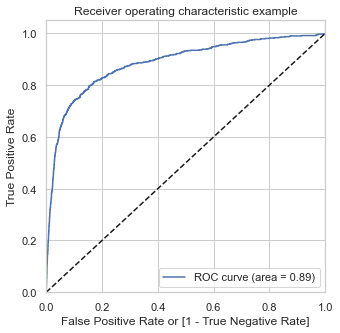

In [130]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Churn, y_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_pred_final.Churn, y_pred_final.Churn_Prob)

In [131]:
# Important features
rfe_cols

Index(['onnet_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'sep_vbc_3g', 'avg_arpu_67',
       'avg_total_ic_mou_67', 'avg_total_rech_num_67'],
      dtype='object')

# Results

When employing Logistic Regression with PCA, the model exhibits improved accuracy, along with enhanced Sensitivity and Specificity. Models with a probability threshold of 0.6 or higher delivered superior performance. Additionally, the Area Under the Curve (AUC) achieved a commendable value of 0.91.

# Important variables

- total_og_mou_8
- sep_vbc_3g
- onnet_mou_8
- loc_ic_t2m_mou_8
- std_og_t2m_mou_8
- avg_total_ic_mou_67
- loc_ic_t2t_mou_8
- og_others_8

# Strategy

Considering the aforementioned variables, diminished mobile usage, whether for calls or data, strongly signals potential churn.

Therefore, whenever a customer's usage drops below the average usage from the previous month, we take the following actions:

Implement targeted offers to encourage retention.
Allocate a dedicated customer service specialist to investigate the reasons for departure and address any outstanding issues reported by the customer.